<a href="https://colab.research.google.com/github/eber0042/Uni/blob/main/Copy_of_Copy2_of_ProjectResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Exploration

In [ ]:
# This cell will be used to intialise everything (mostly) that is need to allow all code to work

# these imports let you use opencv
import cv2 #opencv itself
import math
import numpy as np # matrix manipulations

# the following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

# use this for connecting to drive and setting feature to allow cv2 to work
from google.colab.patches import cv2_imshow
from google.colab import drive

from PIL import Image

drive.mount('/content/drive',force_remount=True) #need this line to be able to connect to my drive

Mounted at /content/drive


In [ ]:
import os

# Path to the folder containing images
folder_path = "/content/drive/MyDrive/Project/samples"

#each image label has code with png at end (36fsd.png)
#code used to extract just the label
def Extract_Code(folder_path):
  codes = []
  count = 0
  for filename in os.listdir(folder_path):
      # Check if the file is a PNG image
      count += 1
      if filename.endswith('.png'):
          # Extract the 5-letter code from the filename
          code = filename.split('.')[0]  # Split by '.' and take the first part
          codes.append(code)

  return codes

sample = Extract_Code(folder_path)

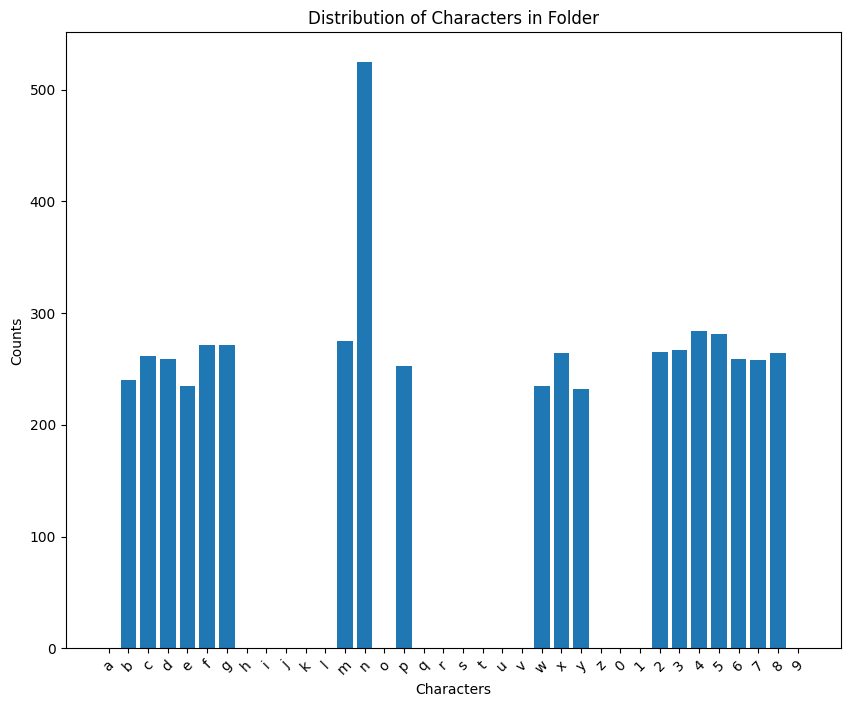

In [ ]:
#check to see the distribution of letters in the data set
character_counts = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0, 'g': 0, 'h': 0, 'i': 0, 'j': 0, 'k': 0, 'l': 0, 'm': 0, 'n': 0, 'o': 0, 'p': 0, 'q': 0, 'r': 0, 's': 0, 't': 0, 'u': 0, 'v': 0, 'w': 0, 'x': 0, 'y': 0, 'z': 0, '0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}
dicst = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

for i in range(len(sample)):
  for j in range(5):
    for k in range(len(character_counts)):
      if dicst[k] == sample[i][j]:
        character_counts[dicst[k]] += 1
        break

# Extract keys and values from the dictionary
characters = list(character_counts.keys())
counts = list(character_counts.values())

# Plotting the histogram
plt.bar(characters, counts)
plt.xlabel('Characters')
plt.ylabel('Counts')
plt.title('Distribution of Characters in Folder')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

# Testing pre-processing methods in here

/content/drive/MyDrive/Project/samples/3ebnn.png


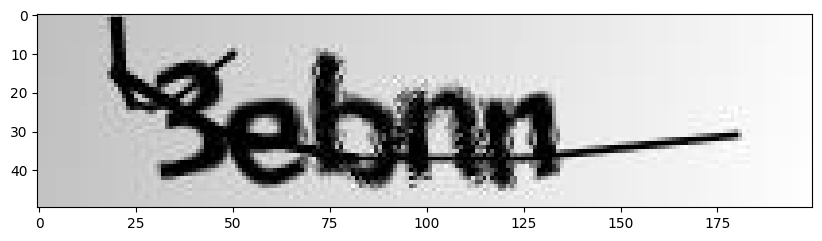

In [ ]:
def get_image_name():
  codes = []
  for filename in os.listdir(folder_path):
    image_path = "/content/drive/MyDrive/Project/samples/" + filename
    return image_path

img1 = cv2.imread(get_image_name(), 0)
print(get_image_name())
plt.imshow(img1, "gray")

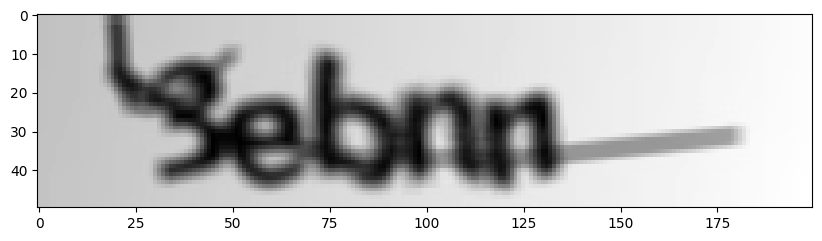

In [ ]:
# Applying the filter
averageBlur = cv2.blur(img1, (5, 5))
plt.imshow(averageBlur, "gray")

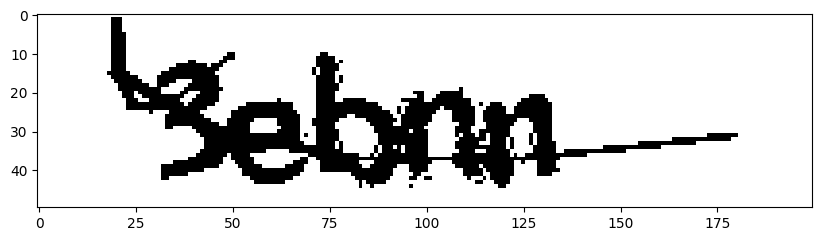

In [ ]:
ret,thresh1 = cv2.threshold(img1,100,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, "gray")

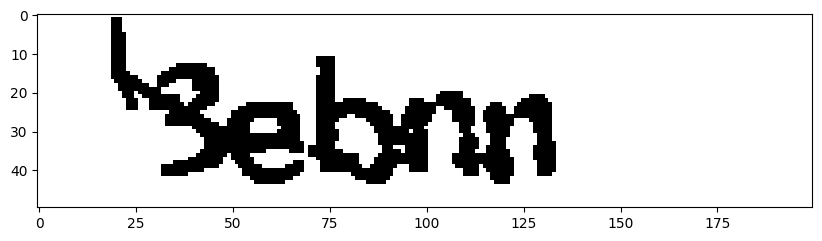

In [ ]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel) # cv2.MORPH_CLOSE

plt.imshow(closing, "gray")

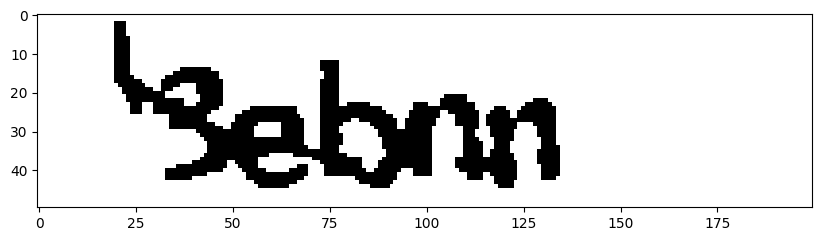

In [ ]:
kernel = np.ones((2, 2), np.uint8)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel) # cv2.MORPH_CLOSE

plt.imshow(opening, "gray")

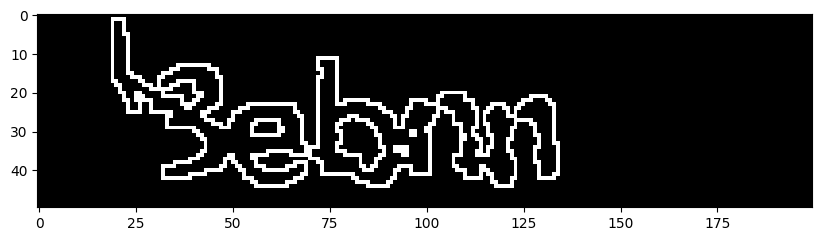

In [ ]:
kernel = np.ones((2, 2), np.uint8)
gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel) # cv2.MORPH_CLOSE

plt.imshow(gradient, "gray")

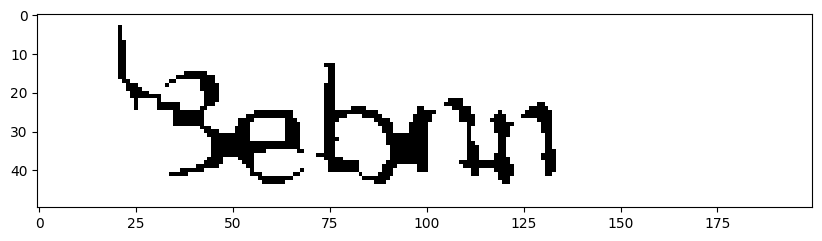

In [ ]:
# Taking a matrix of size 5 as the kernel
kernel = np.ones((3, 3), np.uint8)

img_dilation = cv2.dilate(opening, kernel, iterations=1)

plt.imshow(img_dilation, "gray")

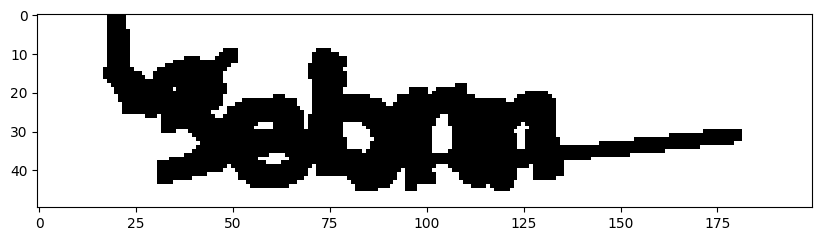

In [ ]:
# Taking a matrix of size 5 as the kernel
kernel = np.ones((3, 3), np.uint8)

# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(thresh1, kernel, iterations=1)

plt.imshow(img_erosion, "gray")

# proccessing the image

Based on the "Testing pre-preocessing methods in here" section, this function allows a quick method to process the images.

In [ ]:
file_names = []
for filename in os.listdir(folder_path):
    file_names.append(filename)
print(len(file_names))
def get_image_name(i):
    image_path = "/content/drive/MyDrive/Project/samples/" + file_names[i]
    return image_path

def process_image(img, image_id, process, display = 1):
  #process can equal thresh1, opening or img_dilation
  # Applying the filter
  averageBlur = cv2.blur(img, (5, 5))

  #using binary
  ret,thresh1 = cv2.threshold(averageBlur,100,255,cv2.THRESH_BINARY)

  kernel = np.ones((3, 3), np.uint8)
  closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel) # cv2.MORPH_CLOSE


  kernel = np.ones((2, 2), np.uint8)
  opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel) # cv2.MORPH_CLOSE

  kernel = np.ones((3, 3), np.uint8)
  img_dilation = cv2.dilate(opening, kernel, iterations=1)

  if process == "thresh1":
    final = thresh1
  elif process == "opening":
    final = opening
  elif process == "img_dilation":
    final = img_dilation
  elif process == "none":
    final = img;


  if display == 1:
    print(file_names[i])
    plt.imshow(final, "gray")
    return final
  else:
    return final

# #getting image
# img = cv2.imread(get_image_name(3), 0)
# process_image(img, 0)


1070


5325m.png
(50, 200)


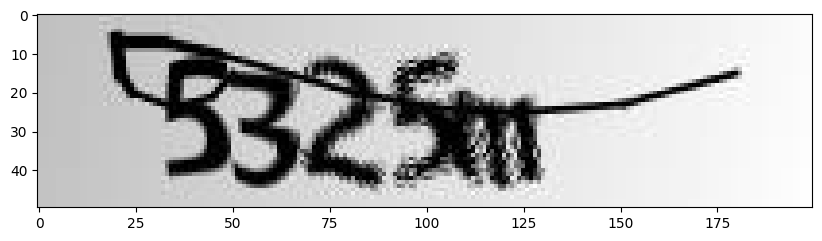

In [ ]:
# testing if the above function is doing as intended
i = 100
img1 = process_image(cv2.imread(get_image_name(i), 0), i, process = "none")
print(img1.shape)

#batch_size of 1070, height of 50, width of 200 and 1 channel.
#19 classes

# I am trying to work on a way to segment my symbols from my data <- not useful anymore

In [ ]:
# Define the ROI (Region of Interest)
pos = [[25, 50], [50, 75], [75, 100], [100, 125], [125, 150]]

startY, endY = 10, 40  # Example values for the Y-axis
startX, endX = pos[4]  # Example values for the X-axis

print(startX)
print(endX)
# Extract the section of the image
roi = img1[startY:endY, startX:endX]

125
150


In [ ]:
# Define the padding
top = 0
bottom = 0

diff = 30 - (endX - startX)
#print(diff - 1)

if diff % 2 == 0:
  left = diff / 2
  right = diff / 2
else:
  diff = diff - 1
  left = diff / 2 + 1
  right = diff / 2

#print(left, right)
# Add padding
extended_image = cv2.copyMakeBorder(roi, 0, 0, int(left),int(right), cv2.BORDER_CONSTANT, value=[255, 255, 255])

(30, 30)


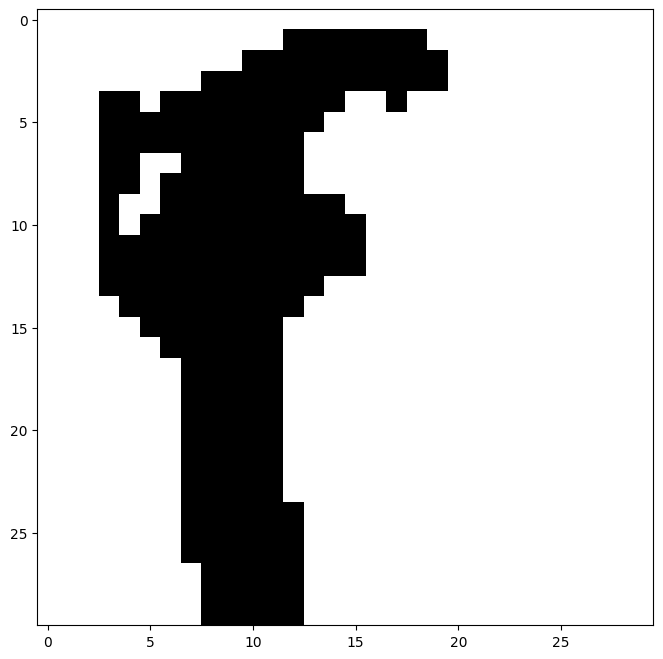

In [ ]:
print(extended_image.shape)
plt.imshow(extended_image, "gray")

# trying to segment all data

In [ ]:
import os

file_names = []
for filename in os.listdir(folder_path):
    file_names.append(filename)

def get_image_name(i):
    image_path = "/content/drive/MyDrive/Project/samples/" + file_names[i]
    return image_path

# Extract labels from filenames
image_labels = []
for filename in file_names:
    label = filename.split('.')[0][:5]  # Extract the first five characters before the .png
    image_labels.append(label)

image_data = []
i = 0
for filename in file_names:
    #getting the image data and storing it \
    image_data.append(process_image(cv2.imread(get_image_name(i), 0), i, "none", 0))
    i += 1

3ebnn


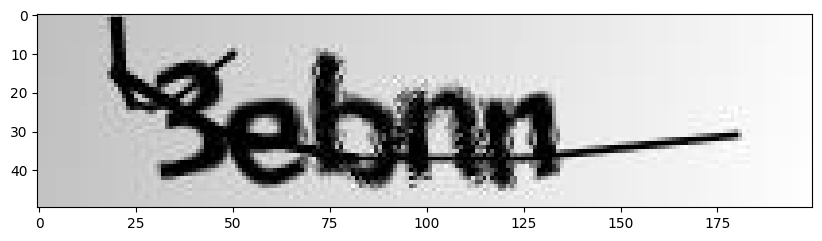

In [ ]:
j = 0
print(image_labels[j])
plt.imshow(image_data[j],"gray")

In [ ]:
# Create image_seg_labels array
image_seg_labels = []
for img_idx, label in enumerate(image_labels):
    for char_idx, char in enumerate(label):
        image_seg_labels.append(f"{char}{char_idx}{img_idx}")

In [ ]:
len(image_seg_labels) #1070*5
#w is th letter
# 0 is the index in the letter
# 900 is the label

5350

In [ ]:
i = 0
image_data_seg = []
for imagedata in image_data:
  img1 = image_data[i]
  i += 1
  for j in range(5):
    # Define the ROI (Region of Interest)
    pos = [[25, 50], [50, 75], [75, 100], [100, 125], [125, 150]]

    startY, endY = 10, 40  # Example values for the Y-axis
    startX, endX = pos[j]  # Example values for the X-axis

    # Extract the section of the image
    roi = img1[startY:endY, startX:endX]

    # Define the padding
    top = 0
    bottom = 0

    diff = 30 - (endX - startX)
    #print(diff - 1)

    if diff % 2 == 0:
      left = diff / 2
      right = diff / 2
    else:
      diff = diff - 1
      left = diff / 2 + 1
      right = diff / 2

    #print(left, right)
    # Add padding
    extended_image = cv2.copyMakeBorder(roi, 0, 0, int(left),int(right), cv2.BORDER_CONSTANT, value=[255, 255, 255])
    image_data_seg.append(extended_image)


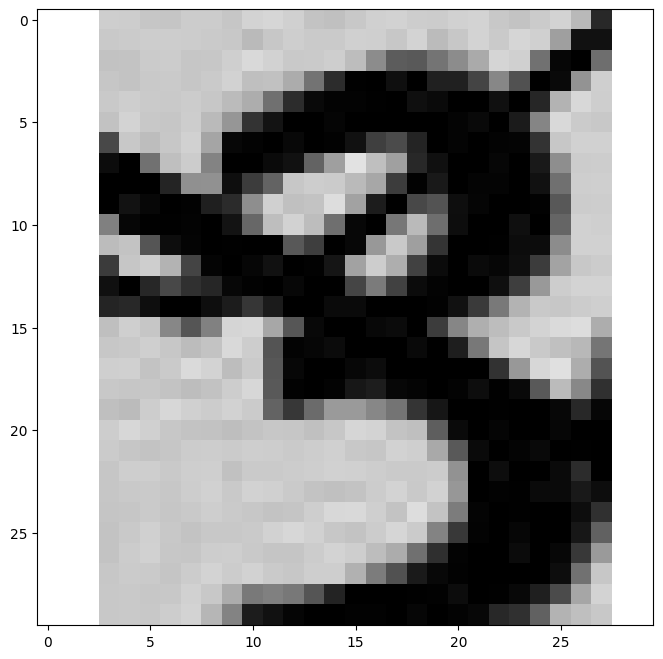

In [ ]:
plt.imshow(image_data_seg[0], "gray")

# adding hot encoding for the lables


In [ ]:
# Define the possible characters and their corresponding indices
character_counts = {'b': 0, 'c': 1, 'd': 2, 'e': 3, 'f': 4, 'g': 5, 'm': 6, 'n': 7, 'p': 8, 'w': 9, 'x': 10, 'y': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18}

# Number of unique characters
num_classes = len(character_counts)

# Function to perform one-hot encoding
def one_hot_encode(character):
    vector = np.zeros(num_classes)
    index = character_counts[character]
    vector[index] = 1
    return vector

# Create a list to hold the one-hot encoded labels
one_hot_encoded_labels = []

# Iterate over the image_seg_labels and create one-hot encoded vectors
for label in image_seg_labels:
    character = label[0]  # Extract the first character
    one_hot_vector = one_hot_encode(character)
    one_hot_encoded_labels.append(one_hot_vector)

# Convert the list to a numpy array for easier manipulation
one_hot_encoded_labels = np.array(one_hot_encoded_labels)

# Debug: Print the one-hot encoded labels to verify
print("One-hot encoded labels:")
print(one_hot_encoded_labels)

# Debug: Print the shape of the one-hot encoded labels array
print("Shape of one-hot encoded labels array:", one_hot_encoded_labels.shape)

One-hot encoded labels:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of one-hot encoded labels array: (5350, 19)


In [ ]:
print(one_hot_encoded_labels[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#CNN

In [ ]:
!pip install keras
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 737.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=241fb651b9b7e76495974a347e050c103a280bc413a20954165f94db9d6c8c3c
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


this works with the validation

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np
from sklearn.metrics import classification_report

# Calculate the labels based on one-hot encoded labels
labels = np.argmax(one_hot_encoded_labels, axis=1)

# Split the data into training and test sets with stratified sampling
train_data, test_data, train_labels, test_labels = train_test_split(
    image_data_seg, one_hot_encoded_labels, test_size=0.2, stratify=labels, random_state=42
)

# Convert train and test data to numpy arrays
train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Calculate the labels based on one-hot encoded labels
labels = np.argmax(train_labels, axis=1)

# Split training data into training and validation sets with stratified sampling
fold_train_data, fold_val_data, fold_train_labels, fold_val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, stratify=labels, random_state=42
)

# Normalize the training and validation data
fold_train_data = fold_train_data / 255.0
fold_val_data = fold_val_data / 255.0

# Add color channel
fold_train_data = fold_train_data.reshape(fold_train_data.shape[0], 30, 30, 1)
fold_val_data = fold_val_data.reshape(fold_val_data.shape[0], 30, 30, 1)

# Normalize the test data
test_data = test_data / 255.0

# Add color channel
test_data = test_data.reshape(test_data.shape[0], 30, 30, 1)

# After training on all folds, you can evaluate the final model on the test data
# Example: test_predictions = model.predict(test_data)
# Example: print(classification_report(np.argmax(test_labels, axis=1), np.argmax(test_predictions, axis=1)))

In [ ]:
print(len(test_data))
print(len(fold_val_data))
print(len(fold_train_data))

1070
1070
3210


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
model = Sequential()
# First Conv2D layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(30, 30, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Second Conv2D layer
model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Third Conv2D layer
model.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(19, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         131200    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

In [ ]:
# without k-fold
# history = model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

#with k-fold
history = model.fit(fold_train_data, fold_train_labels, epochs=30, validation_data=(fold_val_data, fold_val_labels))

Epoch 1/30
101/101 [==============================] - 6s 48ms/step - loss: 2.6049 - accuracy: 0.1629 - val_loss: 2.1244 - val_accuracy: 0.2093
Epoch 2/30
101/101 [==============================] - 6s 59ms/step - loss: 1.4849 - accuracy: 0.4857 - val_loss: 1.1310 - val_accuracy: 0.5776
Epoch 3/30
101/101 [==============================] - 5s 54ms/step - loss: 0.7943 - accuracy: 0.7333 - val_loss: 0.9190 - val_accuracy: 0.7047
Epoch 4/30
101/101 [==============================] - 5s 48ms/step - loss: 0.5080 - accuracy: 0.8209 - val_loss: 0.6127 - val_accuracy: 0.8393
Epoch 5/30
101/101 [==============================] - 7s 74ms/step - loss: 0.3592 - accuracy: 0.8813 - val_loss: 0.6215 - val_accuracy: 0.8000
Epoch 6/30
101/101 [==============================] - 6s 58ms/step - loss: 0.2964 - accuracy: 0.8988 - val_loss: 0.3762 - val_accuracy: 0.8972
Epoch 7/30
101/101 [==============================] - 5s 47ms/step - loss: 0.2214 - accuracy: 0.9252 - val_loss: 0.5504 - val_accuracy: 0.8720

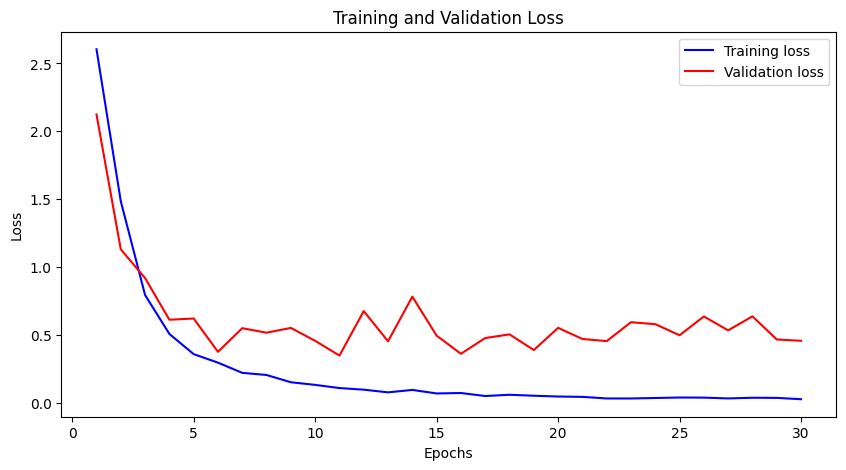

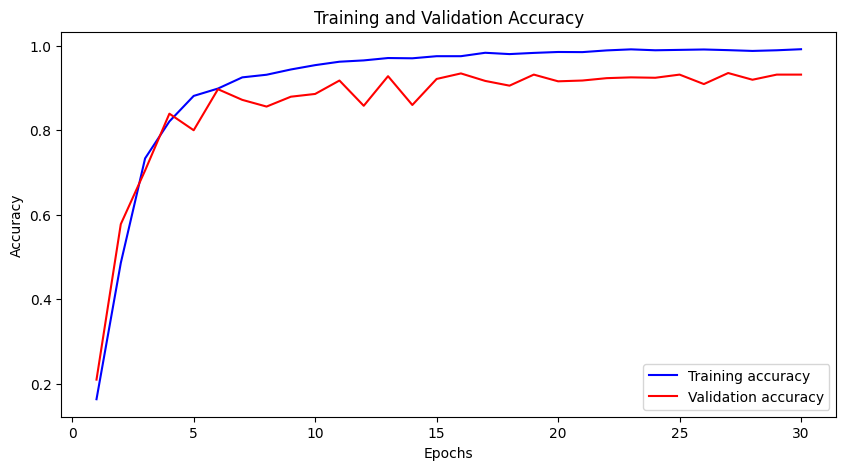

In [ ]:
# Assuming you have trained the model and stored the training history in the 'history' variable

# Get training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_data,test_labels)

34/34 [==============================] - 0s 11ms/step - loss: 0.2945 - accuracy: 0.9374


[0.2945016026496887, 0.9373831748962402]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#predictions = model.predict(x_test)
predictions = np.argmax(model.predict(test_data), axis=-1)

34/34 [==============================] - 0s 11ms/step


In [ ]:
len(predictions)

1070

In [ ]:
test_labels_indexed = np.argmax(test_labels, axis=1)
print(len(test_labels_indexed))

1070


In [ ]:
print(classification_report(test_labels_indexed, predictions))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.96      0.91      0.93        55
           2       0.96      0.96      0.96        54
           3       1.00      0.94      0.97        49
           4       0.96      0.98      0.97        55
           5       0.94      0.89      0.92        56
           6       0.83      0.79      0.81        56
           7       0.87      0.94      0.91       108
           8       0.90      0.90      0.90        52
           9       0.98      0.96      0.97        49
          10       0.95      0.96      0.95        54
          11       0.94      0.98      0.96        48
          12       1.00      0.96      0.98        54
          13       0.93      0.93      0.93        54
          14       0.95      0.95      0.95        58
          15       0.96      0.91      0.94        58
          16       0.96      1.00      0.98        54
          17       0.96    

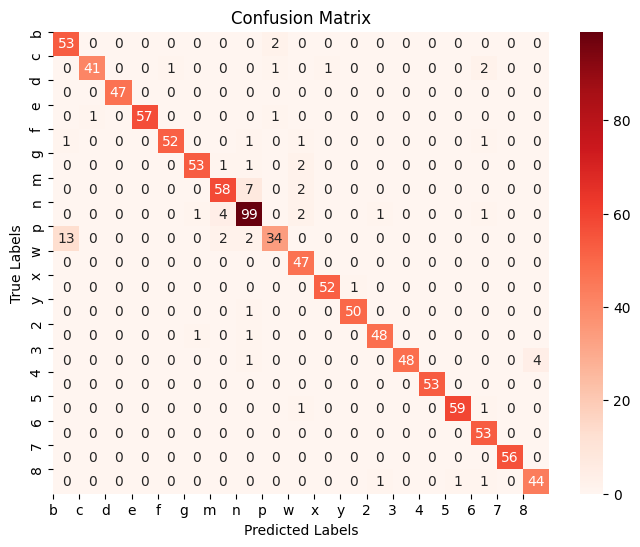

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
character_counts = {'b': 0, 'c': 1, 'd': 2, 'e': 3, 'f': 4, 'g': 5, 'm': 6, 'n': 7, 'p': 8, 'w': 9, 'x': 10, 'y': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18}

# Example predictions and actual labels (replace these with your own data)
predictions = predictions
actual_labels = test_labels_indexed

# Calculate confusion matrix
conf_matrix = confusion_matrix(actual_labels, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g')

# Customize x and y axis labels using character_counts dictionary keys
plt.xticks(ticks=range(len(character_counts)), labels=list(character_counts.keys()))
plt.yticks(ticks=range(len(character_counts)), labels=list(character_counts.keys()))

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import classification_report

# Calculate the labels based on one-hot encoded labels
labels = np.argmax(one_hot_encoded_labels, axis=1)
data = np.array(image_data_seg)

# Initialize StratifiedKFold with the desired number of folds
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop over each fold
for fold, (train_val_index, test_index) in enumerate(skf.split(data, labels)):
    print(f"Fold {fold + 1}")

    # Convert train and test data to numpy arrays
    test_index = np.array(test_index)
    train_val_index = np.array(train_val_index)

    # Split the data into training/validation and test sets
    train_data, test_data = data[train_val_index], data[test_index]
    train_labels, test_labels = one_hot_encoded_labels[train_val_index], one_hot_encoded_labels[test_index]

    # Calculate labels for training/validation split
    train_val_labels_class = np.argmax(train_labels, axis=1)

    # Further split the training/validation set into training and validation sets
    skf_inner = StratifiedKFold(n_splits=num_folds-1, shuffle=True, random_state=42)
    train_index, val_index = next(skf_inner.split(train_data, train_val_labels_class))

    fold_train_data, fold_val_data = train_data[train_index], train_data[val_index]
    fold_train_labels, fold_val_labels = train_labels[train_index], train_labels[val_index]

        # Normalize the training and validation data
    fold_train_data = fold_train_data / 255.0
    fold_val_data = fold_val_data / 255.0

    # Add color channel
    fold_train_data = fold_train_data.reshape(fold_train_data.shape[0], 30, 30, 1)
    fold_val_data = fold_val_data.reshape(fold_val_data.shape[0], 30, 30, 1)

    # Normalize the test data
    test_data = test_data / 255.0

    # Add color channel
    test_data = test_data.reshape(test_data.shape[0], 30, 30, 1)



Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


In [ ]:
print(len(test_data))
print(len(fold_val_data))
print(len(fold_train_data))

1070
1070
3210


#adding evaulation process to model

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np
from sklearn.metrics import classification_report
def generate_data(random_state, num):
    # Calculate the labels based on one-hot encoded labels
    labels = np.argmax(one_hot_encoded_labels, axis=1)
    data = np.array(image_data_seg)

    # Initialize StratifiedKFold with the desired number of folds
    num_folds = 5
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=random_state)

    # Loop over each fold
    for fold, (train_val_index, test_index) in enumerate(skf.split(data, labels)):
        print(f"Fold {fold + 1}")

        # Convert train and test data to numpy arrays
        test_index = np.array(test_index)
        train_val_index = np.array(train_val_index)

        # Split the data into training/validation and test sets
        train_data, test_data = data[train_val_index], data[test_index]
        train_labels, test_labels = one_hot_encoded_labels[train_val_index], one_hot_encoded_labels[test_index]

        # Calculate labels for training/validation split
        train_val_labels_class = np.argmax(train_labels, axis=1)

        # Further split the training/validation set into training and validation sets
        skf_inner = StratifiedKFold(n_splits=num_folds-1, shuffle=True, random_state=random_state)
        train_index, val_index = next(skf_inner.split(train_data, train_val_labels_class))

        fold_train_data, fold_val_data = train_data[train_index], train_data[val_index]
        fold_train_labels, fold_val_labels = train_labels[train_index], train_labels[val_index]

            # Normalize the training and validation data
        fold_train_data = fold_train_data / 255.0
        fold_val_data = fold_val_data / 255.0

        # Add color channel
        fold_train_data = fold_train_data.reshape(fold_train_data.shape[0], 30, 30, 1)
        fold_val_data = fold_val_data.reshape(fold_val_data.shape[0], 30, 30, 1)

        # Normalize the test data
        test_data = test_data / 255.0

        # Add color channel
        test_data = test_data.reshape(test_data.shape[0], 30, 30, 1)

        if num == fold: break

    return test_data, test_labels, fold_train_data, fold_train_labels, fold_val_data, fold_val_labels

In [ ]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

n_outer =  1 # this should be 10 for the "10"x 10 CV, you could use a smaller values, say 2, for prototyping
n_splits = 1 # this should be 10 for the 10 x "10" CV, you could use a smaller values, say 2, for prototyping
acc_outer_CNN = []
f1_outer_CNN  = []
mcc_outer_CNN  = []

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten



for i_outer in range(0,n_outer):

  print('#### Outer Iteration {} of {}'.format(i_outer+1,n_outer))

  for i_inner in range(0,n_splits):
    print('#### Inner Iteration {} of {}'.format(i_inner+1,n_splits))
    #generate the data
    test_data, test_labels, fold_train_data, fold_train_labels, fold_val_data, fold_val_labels = generate_data(i_outer, i_inner)

    #make model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(30, 30, 1), activation='relu'))

    model.add(MaxPool2D(pool_size =(2,2)))
    model.add(Flatten())

    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(19, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])
    #train the model based on the data
    history = model.fit(fold_train_data, fold_train_labels, epochs=20, validation_data=(fold_val_data, fold_val_labels))
    #evaluate the model
    model.evaluate(test_data,test_labels)
    predictions = np.argmax(model.predict(test_data), axis=-1)
    test_labels_indexed = np.argmax(test_labels, axis=1)

    acc = accuracy_score(test_labels_indexed,predictions)
    f1 = f1_score(test_labels_indexed,predictions,average='macro')
    mcc = matthews_corrcoef(test_labels_indexed,predictions)

    acc_outer_CNN.append(acc)
    f1_outer_CNN.append(f1)
    mcc_outer_CNN.append(mcc)

print('SVM Outer accuracy M = {:.2f}, SD = {:.4f}'.format(np.mean(acc_outer_CNN)*100,np.std(acc_outer_CNN)*100))
print('SVM Outer F1-Score M = {:.3f}, SD = {:.4f}'.format(np.mean(f1_outer_CNN),np.std(f1_outer_CNN)))
print('SVM Outer MCC      M = {:.3f}, SD = {:.4f}'.format(np.mean(mcc_outer_CNN),np.std(mcc_outer_CNN)))

#### Outer Iteration 1 of 1
#### Inner Iteration 1 of 1
Fold 1
Epoch 1/20
101/101 [==============================] - 7s 56ms/step - loss: 2.5651 - accuracy: 0.2246 - val_loss: 2.1859 - val_accuracy: 0.3121
Epoch 2/20
101/101 [==============================] - 7s 73ms/step - loss: 1.7328 - accuracy: 0.4913 - val_loss: 1.7463 - val_accuracy: 0.4607
Epoch 3/20
101/101 [==============================] - 6s 56ms/step - loss: 1.2725 - accuracy: 0.6318 - val_loss: 1.8193 - val_accuracy: 0.4832
Epoch 4/20
101/101 [==============================] - 7s 74ms/step - loss: 0.9991 - accuracy: 0.7162 - val_loss: 1.2715 - val_accuracy: 0.6346
Epoch 5/20
101/101 [==============================] - 6s 60ms/step - loss: 0.8228 - accuracy: 0.7657 - val_loss: 1.2096 - val_accuracy: 0.6271
Epoch 6/20
101/101 [==============================] - 6s 54ms/step - loss: 0.6781 - accuracy: 0.8047 - val_loss: 0.9357 - val_accuracy: 0.7056
Epoch 7/20
101/101 [==============================] - 8s 78ms/step - loss: 0.56

In [ ]:
# baseline
# Multiply each value by 100 to convert them to percentages
acc_outer_CNN_percent = np.array(acc_outer_CNN) * 100
f1_outer_CNN_percent = np.array(f1_outer_CNN) * 100
mcc_outer_CNN_percent = np.array(mcc_outer_CNN) * 100

# Calculate and print the standard deviation and mean for each metric in percentage
print("Accuracy:")
print("Mean:", np.mean(acc_outer_CNN_percent))
print("Standard Deviation:", np.std(acc_outer_CNN_percent))
print()

print("F1-Score:")
print("Mean:", np.mean(f1_outer_CNN_percent))
print("Standard Deviation:", np.std(f1_outer_CNN_percent))
print()

print("MCC:")
print("Mean:", np.mean(mcc_outer_CNN_percent))
print("Standard Deviation:", np.std(mcc_outer_CNN_percent))

Accuracy:
Mean: 84.2056074766355
Standard Deviation: 0.0

F1-Score:
Mean: 84.76093497089913
Standard Deviation: 0.0

MCC:
Mean: 83.33802435838786
Standard Deviation: 0.0


In [ ]:
    model = Sequential()
    # First Conv2D layer
    model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(30, 30, 1), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    # Second Conv2D layer
    model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    # Third Conv2D layer
    model.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(19, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

In [ ]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

n_outer =  2 # this should be 10 for the "10"x 10 CV, you could use a smaller values, say 2, for prototyping
n_splits = 2 # this should be 10 for the 10 x "10" CV, you could use a smaller values, say 2, for prototyping
acc_outer_CNN1 = []
f1_outer_CNN1  = []
mcc_outer_CNN1  = []

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten



for i_outer in range(0,n_outer):

  print('#### Outer Iteration {} of {}'.format(i_outer+1,n_outer))

  for i_inner in range(0,n_splits):
    print('#### Inner Iteration {} of {}'.format(i_inner+1,n_splits))
    #generate the data
    test_data, test_labels, fold_train_data, fold_train_labels, fold_val_data, fold_val_labels = generate_data(i_outer, i_inner)

    #make model
    model = Sequential()
    # First Conv2D layer
    model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(30, 30, 1), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    # Second Conv2D layer
    model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    # Third Conv2D layer
    model.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(19, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

    #train the model based on the data
    history = model.fit(fold_train_data, fold_train_labels, epochs=30, validation_data=(fold_val_data, fold_val_labels))
    #evaluate the model
    model.evaluate(test_data,test_labels)
    predictions = np.argmax(model.predict(test_data), axis=-1)
    test_labels_indexed = np.argmax(test_labels, axis=1)

    acc = accuracy_score(test_labels_indexed,predictions)
    f1 = f1_score(test_labels_indexed,predictions,average='macro')
    mcc = matthews_corrcoef(test_labels_indexed,predictions)

    acc_outer_CNN1.append(acc)
    f1_outer_CNN1.append(f1)
    mcc_outer_CNN1.append(mcc)

print('SVM Outer accuracy M = {:.2f}, SD = {:.4f}'.format(np.mean(acc_outer_CNN1)*100,np.std(acc_outer_CNN1)*100))
print('SVM Outer F1-Score M = {:.3f}, SD = {:.4f}'.format(np.mean(f1_outer_CNN1),np.std(f1_outer_CNN1)))
print('SVM Outer MCC      M = {:.3f}, SD = {:.4f}'.format(np.mean(mcc_outer_CNN1),np.std(mcc_outer_CNN1)))

#### Outer Iteration 1 of 2
Processing fold 1/5
Processing fold 2/5
Processing fold 3/5
Processing fold 4/5
Processing fold 5/5
#### Inner Iteration 1 of 2
Epoch 1/30
81/81 [==============================] - 7s 59ms/step - loss: 2.8266 - accuracy: 0.1180 - val_loss: 2.8472 - val_accuracy: 0.1297
Epoch 2/30
81/81 [==============================] - 4s 55ms/step - loss: 2.0677 - accuracy: 0.2944 - val_loss: 1.7253 - val_accuracy: 0.3680
Epoch 3/30
81/81 [==============================] - 7s 81ms/step - loss: 1.2795 - accuracy: 0.5576 - val_loss: 1.4245 - val_accuracy: 0.5596
Epoch 4/30
81/81 [==============================] - 5s 56ms/step - loss: 0.8148 - accuracy: 0.7220 - val_loss: 0.7188 - val_accuracy: 0.7827
Epoch 5/30
81/81 [==============================] - 4s 55ms/step - loss: 0.5789 - accuracy: 0.8030 - val_loss: 0.6046 - val_accuracy: 0.8189
Epoch 6/30
81/81 [==============================] - 7s 84ms/step - loss: 0.4086 - accuracy: 0.8637 - val_loss: 0.5381 - val_accuracy: 0.829

In [ ]:
#others
# Multiply each value by 100 to convert them to percentages
acc_outer_CNN_percent = np.array(acc_outer_CNN1) * 100
f1_outer_CNN_percent = np.array(f1_outer_CNN1) * 100
mcc_outer_CNN_percent = np.array(mcc_outer_CNN1) * 100

# Calculate and print the standard deviation and mean for each metric in percentage
print("Accuracy:")
print("Mean:", np.mean(acc_outer_CNN_percent))
print("Standard Deviation:", np.std(acc_outer_CNN_percent))
print()

print("F1-Score:")
print("Mean:", np.mean(f1_outer_CNN_percent))
print("Standard Deviation:", np.std(f1_outer_CNN_percent))
print()

print("MCC:")
print("Mean:", np.mean(mcc_outer_CNN_percent))
print("Standard Deviation:", np.std(mcc_outer_CNN_percent))

Accuracy:
Mean: 92.59345794392524
Standard Deviation: 0.6317058801212967

F1-Score:
Mean: 92.98996139605208
Standard Deviation: 0.7448887844250907

MCC:
Mean: 92.18416056440998
Standard Deviation: 0.66091855025225


comparing

In [ ]:
from scipy import stats
normstat = stats.kstest(np.append(acc_outer_CNN,acc_outer_CNN1),'norm')
print(normstat)
print(stats.ttest_ind(acc_outer_CNN,acc_outer_CNN1))
print(stats.ttest_ind(f1_outer_CNN,f1_outer_CNN1))
print(stats.ttest_ind(mcc_outer_CNN,mcc_outer_CNN1))

KstestResult(statistic=0.8001217166979673, pvalue=5.264078952744171e-06, statistic_location=0.8420560747663551, statistic_sign=-1)
TtestResult(statistic=-14.111251215637719, pvalue=7.907784626696281e-06, df=6.0)
TtestResult(statistic=-12.799433196081745, pvalue=1.3968014456167245e-05, df=6.0)
TtestResult(statistic=-14.405911595963873, pvalue=7.007376548800247e-06, df=6.0)


#stuff used to develop model 3, not useful anymore

I developed this in another colab to keep things clean for me

The first thing done is to segment the data

In [ ]:
#takes a while to load
# this coe used to extract the lable name and data from all images in file, currently not split for use in training and testing
import os

file_names = []
file_names_full = []
for filename in os.listdir(folder_path):
    file_names.append(filename)

file_names_full = file_names #store all names
file_names = file_names[:-70] #remove last 70 from filenames

def get_image_name(i):
    image_path = "/content/drive/MyDrive/Project/samples/" + file_names[i]
    return image_path

# Extract labels from filenames
image_labels = []
for filename in file_names:
    # Assuming filenames have the format "ABCDE_image.jpg", where "ABCDE" is the label
    label = filename.split('_')[0][:5]  # Extract the first five characters before the first underscore
    image_labels.append(label)

image_data = []
for filename in file_names:
    #getting the image data and storing it \
    #print(filename)
    name = "/content/drive/MyDrive/Project/samples/"+filename
    image_data.append(cv2.imread(name,0))

3ebnn


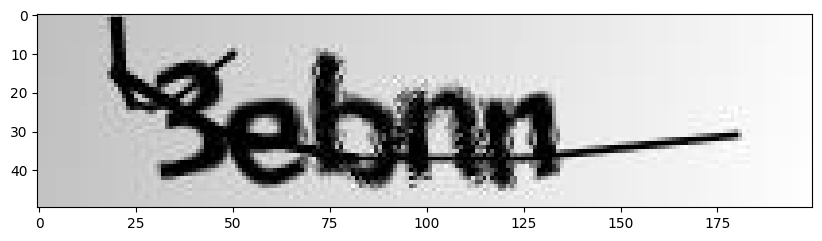

In [ ]:
j = 0
print(image_labels[j])
plt.imshow(image_data[j],"gray")

In [ ]:
import os

file_names = []
for filename in os.listdir(folder_path):
    file_names.append(filename)

def get_image_name(i):
    image_path = "/content/drive/MyDrive/Project/samples/" + file_names[i]
    return image_path

# Extract labels from filenames
image_labels = []
for filename in file_names:
    # Assuming filenames have the format "ABCDE_image.jpg", where "ABCDE" is the label
    label = filename.split('_')[0][:5]  # Extract the first five characters before the first underscore
    image_labels.append(label)

image_data = []
i = 0
for filename in file_names:
    #getting the image data and storing it \
    image_data.append(process_image(cv2.imread(get_image_name(i), 0), i, "none", 0))
    i += 1

3ebnn


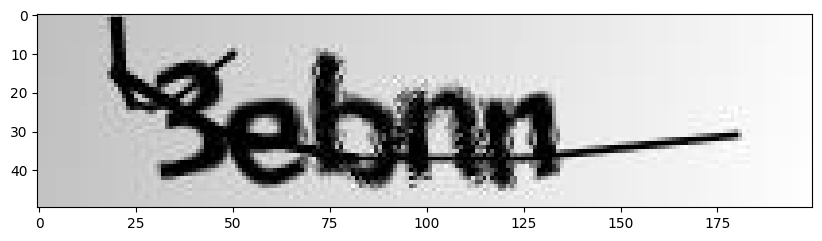

In [ ]:
j = 0
print(image_labels[j])
plt.imshow(image_data[j],"gray")

In [ ]:
# Create image_seg_labels array
image_seg_labels = []
for img_idx, label in enumerate(image_labels):
    for char_idx, char in enumerate(label):
        image_seg_labels.append(f"{char}{char_idx}{img_idx}")

In [ ]:
len(image_seg_labels) #1070*5
#w is th letter
# 0 is the index in the letter
# 900 is the label

5350

In [ ]:
i = 0
image_data_seg = []
for imagedata in image_data:
  img1 = image_data[i]
  i += 1
  for j in range(5):
    # Define the ROI (Region of Interest)
    pos = [[25, 50], [50, 75], [75, 100], [100, 125], [125, 150]]

    startY, endY = 10, 40  # Example values for the Y-axis
    startX, endX = pos[j]  # Example values for the X-axis

    # Extract the section of the image
    roi = img1[startY:endY, startX:endX]

    # Define the padding
    top = 0
    bottom = 0

    diff = 30 - (endX - startX)
    #print(diff - 1)

    if diff % 2 == 0:
      left = diff / 2
      right = diff / 2
    else:
      diff = diff - 1
      left = diff / 2 + 1
      right = diff / 2

    #print(left, right)
    # Add padding
    extended_image = cv2.copyMakeBorder(roi, 0, 0, int(left),int(right), cv2.BORDER_CONSTANT, value=[255, 255, 255])
    image_data_seg.append(extended_image)

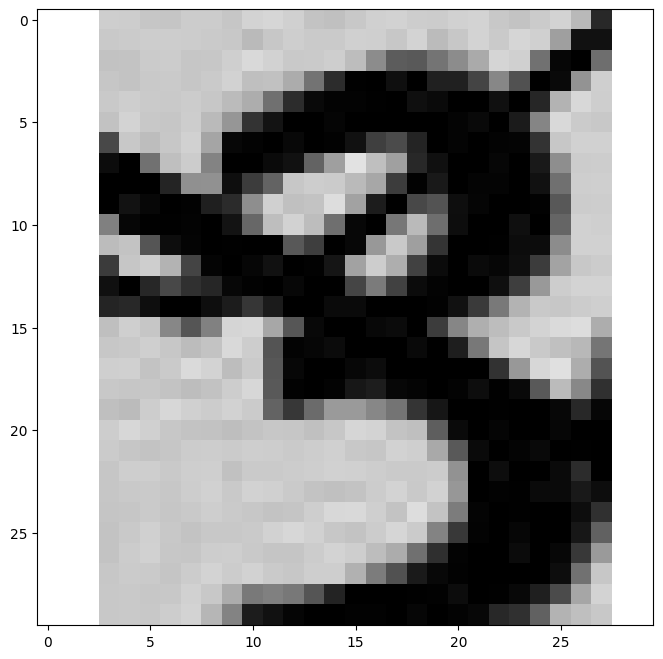

In [ ]:
plt.imshow(image_data_seg[0], "gray")

One-hot encoding

In [ ]:
# Define the possible characters and their corresponding indices
character_counts = {'b': 0, 'c': 1, 'd': 2, 'e': 3, 'f': 4, 'g': 5, 'm': 6, 'n': 7, 'p': 8, 'w': 9, 'x': 10, 'y': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18}

# Number of unique characters
num_classes = len(character_counts)

# Function to perform one-hot encoding
def one_hot_encode(character):
    vector = np.zeros(num_classes)
    index = character_counts[character]
    vector[index] = 1
    return vector

# Create a list to hold the one-hot encoded labels
one_hot_encoded_labels = []

# Iterate over the image_seg_labels and create one-hot encoded vectors
for label in image_seg_labels:
    character = label[0]  # Extract the first character
    one_hot_vector = one_hot_encode(character)
    one_hot_encoded_labels.append(one_hot_vector)

# Convert the list to a numpy array for easier manipulation
one_hot_encoded_labels = np.array(one_hot_encoded_labels)

# Debug: Print the one-hot encoded labels to verify
print("One-hot encoded labels:")
print(one_hot_encoded_labels)

# Debug: Print the shape of the one-hot encoded labels array
print("Shape of one-hot encoded labels array:", one_hot_encoded_labels.shape)

One-hot encoded labels:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of one-hot encoded labels array: (5350, 19)


In [ ]:
print(one_hot_encoded_labels[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Need to split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np
from sklearn.metrics import classification_report

# Calculate the labels based on one-hot encoded labels
labels = np.argmax(one_hot_encoded_labels, axis=1)

# Split the data into training and test sets with stratified sampling
train_data, test_data, train_labels, test_labels = train_test_split(
    image_data_seg, one_hot_encoded_labels, test_size=0.2, stratify=labels, random_state=42
)

# Convert train and test data to numpy arrays
train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Calculate the labels based on one-hot encoded labels
labels = np.argmax(train_labels, axis=1)

# Split training data into training and validation sets with stratified sampling
fold_train_data, fold_val_data, fold_train_labels, fold_val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, stratify=labels, random_state=42
)

# Normalize the training and validation data
fold_train_data = fold_train_data / 255.0
fold_val_data = fold_val_data / 255.0

# Add color channel
fold_train_data = fold_train_data.reshape(fold_train_data.shape[0], 30, 30, 1)
fold_val_data = fold_val_data.reshape(fold_val_data.shape[0], 30, 30, 1)

# Normalize the test data
test_data = test_data / 255.0

# Add color channel
test_data = test_data.reshape(test_data.shape[0], 30, 30, 1)

# After training on all folds, you can evaluate the final model on the test data
# Example: test_predictions = model.predict(test_data)
# Example: print(classification_report(np.argmax(test_labels, axis=1), np.argmax(test_predictions, axis=1)))

In [ ]:
print(len(test_data))
print(len(fold_val_data))
print(len(fold_train_data))

1070
1070
3210


Need to adjust the training and validation labels to include the augmentation

In [ ]:
new_val_labels = []
new_train_labels = []

for label in fold_val_labels:
  for _ in range(27):
    new_val_labels.append(label)

for label in fold_train_labels:
  for _ in range(27):
    new_train_labels.append(label)

print(len(new_val_labels))
print(len(new_train_labels))

28890
86670


# this stuff if for developing model 3, which has augmentation of the input data

In [ ]:
#takes a while to load
# this code used to extract the lable name and data from all images in file, currently not split for use in training and testing
import os

file_names = []
file_names_full = []
for filename in os.listdir(folder_path):
    file_names.append(filename)

file_names_full = file_names #store all names
file_names = file_names#[:-70] #remove last 70 from filenames for end of test

def get_image_name(i):
    image_path = "/content/drive/MyDrive/Project/samples/" + file_names[i]
    return image_path

# Extract labels from filenames
image_labels = []
for filename in file_names:
    label = filename.split('.')[0][:5]  # Extract the first five characters before the .png
    image_labels.append(label)

image_data = []
for filename in file_names:
    #getting the image data and storing it \
    #print(filename)
    name = "/content/drive/MyDrive/Project/samples/"+filename
    image_data.append(cv2.imread(name,0))

3ebnn


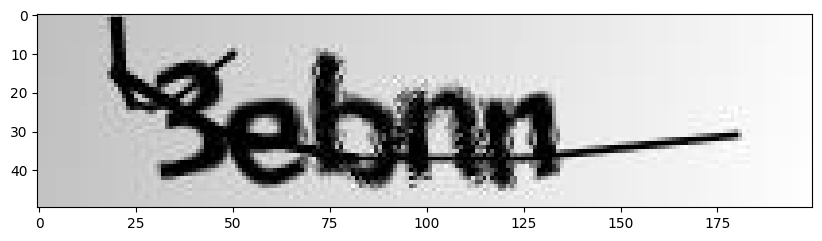

In [ ]:
j = 0
print(image_labels[j])
plt.imshow(image_data[j],"gray")

Split the data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(image_data, image_labels, test_size=0.2, random_state=42)


mcg43


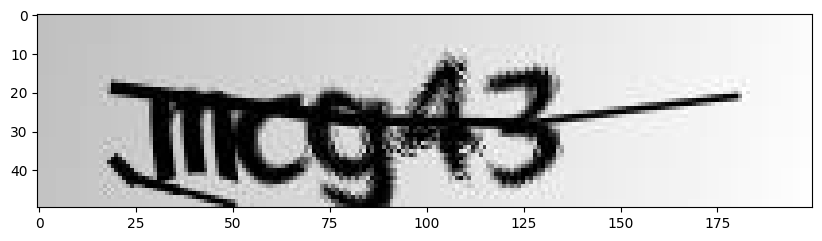

In [ ]:
print(test_labels[0])
plt.imshow(test_data[0], "gray")

Process test data first

In [ ]:
# Create test_labels_seg array
test_labels_seg = []
for img_idx, label in enumerate(test_labels):
    for char_idx, char in enumerate(label):
        test_labels_seg.append(f"{char}{char_idx}{img_idx}")

In [ ]:
len(test_labels_seg) #1070*5
#w is the letter
# 0 is the index in the letter
# 900 is the label

1070

In [ ]:
i = 0
test_data_seg = []
for testdata in test_data:
  img1 = process_image(test_data[i], i, "none", 0)
  i += 1
  for j in range(5):
    # Define the ROI (Region of Interest)
    pos = [[25, 50], [50, 75], [75, 100], [100, 125], [125, 150]]

    startY, endY = 10, 40  # Example values for the Y-axis
    startX, endX = pos[j]  # Example values for the X-axis

    # Extract the section of the image
    roi = img1[startY:endY, startX:endX]

    # Define the padding
    top = 0
    bottom = 0

    diff = 30 - (endX - startX)
    #print(diff - 1)

    if diff % 2 == 0:
      left = diff / 2
      right = diff / 2
    else:
      diff = diff - 1
      left = diff / 2 + 1
      right = diff / 2

    #print(left, right)
    # Add padding
    extended_image = cv2.copyMakeBorder(roi, 0, 0, int(left),int(right), cv2.BORDER_CONSTANT, value=[255, 255, 255])
    test_data_seg.append(extended_image)

c10


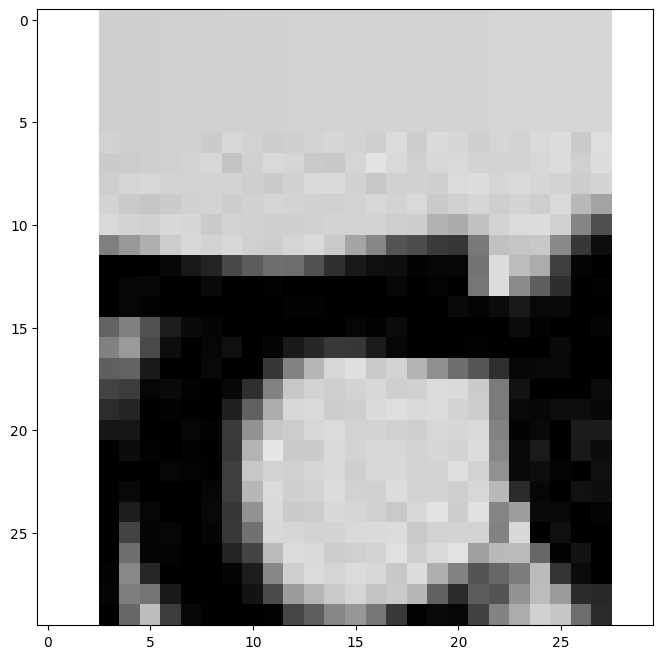

In [ ]:
print(test_labels_seg[1])
plt.imshow(test_data_seg[1], "gray")

In [ ]:
# Define the possible characters and their corresponding indices
character_counts = {'b': 0, 'c': 1, 'd': 2, 'e': 3, 'f': 4, 'g': 5, 'm': 6, 'n': 7, 'p': 8, 'w': 9, 'x': 10, 'y': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18}

# Number of unique characters
num_classes = len(character_counts)

# Function to perform one-hot encoding
def one_hot_encode(character):
    vector = np.zeros(num_classes)
    index = character_counts[character]
    vector[index] = 1
    return vector

# Create a list to hold the one-hot encoded labels
one_hot_encoded_test_labels_seg = []

# Iterate over the image_seg_labels and create one-hot encoded vectors
for label in test_labels_seg:
    character = label[0]  # Extract the first character
    one_hot_vector = one_hot_encode(character)
    one_hot_encoded_test_labels_seg.append(one_hot_vector)

# Convert the list to a numpy array for easier manipulation
one_hot_encoded_test_labels_seg = np.array(one_hot_encoded_test_labels_seg)

# Debug: Print the one-hot encoded labels to verify
print("One-hot encoded labels:")
print(one_hot_encoded_test_labels_seg)

# Debug: Print the shape of the one-hot encoded labels array
print("Shape of one-hot encoded labels array:", one_hot_encoded_test_labels_seg.shape)

One-hot encoded labels:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of one-hot encoded labels array: (1070, 19)


In [ ]:
print(one_hot_encoded_test_labels_seg[1])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Next processing the training data with augmention.

In [ ]:
# Create image_seg_labels array with more variations
train_labels_seg = []

# Define the possible variations for each character
# process_types = ['t', 'o', 'i', 'n']
# segment_shifts = ['u', 'd', 'n']
# image_shifts = ['l', 'r', 'n']
# rotations = ['<', '>', 'n']

process_types = ['n']
segment_shifts = ['u', 'd', 'n']
image_shifts = ['l', 'r', 'n']
rotations = ['<', '>', 'n']

for img_index, label in enumerate(train_labels):
    if not isinstance(label, str):
        print(f"Warning: The label at index {img_index} is not a string. Skipping this label.")
        continue

    for char_index, char in enumerate(label):
        if not isinstance(char, str) or len(char) != 1:
            print(f"Warning: The character at label index {img_index} and char index {char_index} is invalid. Skipping this character.")
            continue

        for process_type in process_types:
            for segment_shift in segment_shifts:
                for image_shift in image_shifts:
                    for rotation in rotations:
                        train_labels_seg.append(f"{char}{char_index}{process_type}{segment_shift}{image_shift}{rotation}{img_index}")

# Optional: Print the first few entries to verify
print("First few entries in train_labels_seg:", train_labels_seg[:10])


First few entries in train_labels_seg: ['c0nul<0', 'c0nul>0', 'c0nuln0', 'c0nur<0', 'c0nur>0', 'c0nurn0', 'c0nun<0', 'c0nun>0', 'c0nunn0', 'c0ndl<0']


In [ ]:
print(train_labels_seg[0])
print(train_labels_seg[1]) #1070*5
print(train_labels_seg[2]) #1070*5

print(len(train_labels_seg)) #1070*5*3^4

print(train_labels_seg[2][6:])
#w is th letter
# 0 is the index in the letter
# 900 is the label

c0nul<0
c0nul>0
c0nuln0
115560
0


In [ ]:
def shift_image(image, vert, hoz, index):
  # Define the ROI (Region of Interest)
    pos = [[25, 50], [50, 75], [75, 100], [100, 125], [125, 150]]

    startY, endY = 10 + vert, 40 + vert  # Example values for the Y-axis
    #print(pos[index])
    startX, endX = pos[index]  # Example values for the X-axis
    startX += hoz
    endX += hoz
    # Extract the section of the image
    roi = image[startY:endY, startX:endX]

    # Define the padding
    top = 0
    bottom = 0

    diff = 30 - (endX - startX)
    #print(diff - 1)

    if diff % 2 == 0:
      left = diff / 2
      right = diff / 2
    else:
      diff = diff - 1
      left = diff / 2 + 1
      right = diff / 2

    #print(left, right)
    # Add padding
    extended_image = cv2.copyMakeBorder(roi, 0, 0, int(left),int(right), cv2.BORDER_CONSTANT, value=[255, 255, 255])

    return extended_image

In [ ]:

def rotate_image(image, angle):
    # Get the dimensions of the image
    (h, w) = image.shape[:2]
    # Get the center of the image
    center = (w // 2, h // 2)

    # Define the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    # Perform the rotation with a border value of 255 (white)
    rotated = cv2.warpAffine(image, M, (w, h), borderValue=(255, 255, 255))

    return rotated


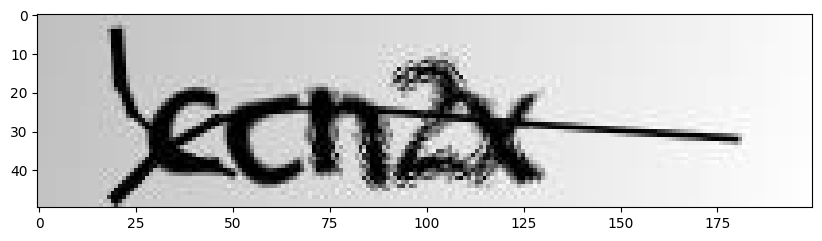

In [ ]:
plt.imshow(train_data[0],"gray")

In [ ]:
train_data_seg = []
track = 0
for seg in train_labels_seg:
  letter_index = int(seg[1])
  type_proc = seg[2]
  shift_vert = seg[3]
  shift_horz = seg[4]
  rotate = seg[5]
  label_index = int(seg[6:])

  #first process the image based on type_proc
  i = label_index
  #print(i)

  if type_proc == 't':
    img = process_image(train_data[i], i, process = "thresh1", display = 0)
  elif type_proc == 'o':
    img = process_image(train_data[i], i, process = "opening", display = 0)
  elif type_proc == 'i':
    img = process_image(train_data[i], i, process = "img_dilation", display = 0)
  else: img = process_image(train_data[i], i, process = "none", display = 0)

  #plt.imshow(img,"gray")
  #plt.show()

  #next decide to shift image verticaly or horizontally
  shift = [shift_vert,shift_horz]

  # Decide to shift image vertically or horizontally
  shift_values = []
  for k in [shift_vert, shift_horz]:
      if k == 'u' or k == 'r':
          shift_values.append(5)
      elif k == 'd' or k == 'l':
          shift_values.append(-5)
      else:
          shift_values.append(0)

  shift_vert_val, shift_horz_val = shift_values

  if rotate == '>':
    angle = 5
  elif rotate == '<':
    angle = -5
  else:
    angle = 0

  # Apply shift and rotation
  img_shifted = shift_image(img, shift_vert_val, shift_horz_val, letter_index)
  img_fin = rotate_image(img_shifted, angle)

  track += 1
  print("Current point is " + str(track) + ". Only " + str(len(train_labels_seg) - track) + " left.")
  train_data_seg.append(img_fin)

  # had an issue with the cell going for every to finish, the issue was when
  # i processed the image, i did not turn the display of so it was
  # printing every image

  # if len(train_labels_seg) - track == 107999:
  #   print("hello")
  #   break



Streaming output truncated to the last 5000 lines.
Current point is 110561. Only 4999 left.
Current point is 110562. Only 4998 left.
Current point is 110563. Only 4997 left.
Current point is 110564. Only 4996 left.
Current point is 110565. Only 4995 left.
Current point is 110566. Only 4994 left.
Current point is 110567. Only 4993 left.
Current point is 110568. Only 4992 left.
Current point is 110569. Only 4991 left.
Current point is 110570. Only 4990 left.
Current point is 110571. Only 4989 left.
Current point is 110572. Only 4988 left.
Current point is 110573. Only 4987 left.
Current point is 110574. Only 4986 left.
Current point is 110575. Only 4985 left.
Current point is 110576. Only 4984 left.
Current point is 110577. Only 4983 left.
Current point is 110578. Only 4982 left.
Current point is 110579. Only 4981 left.
Current point is 110580. Only 4980 left.
Current point is 110581. Only 4979 left.
Current point is 110582. Only 4978 left.
Current point is 110583. Only 4977 left.
Curren

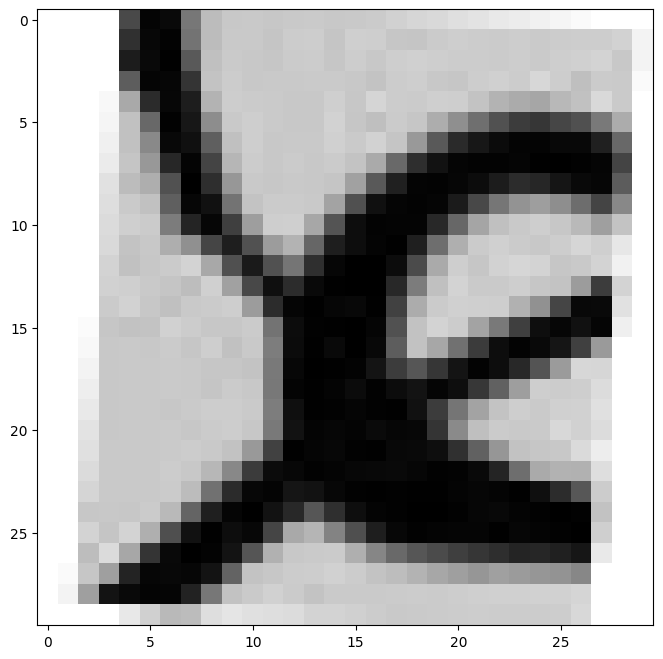

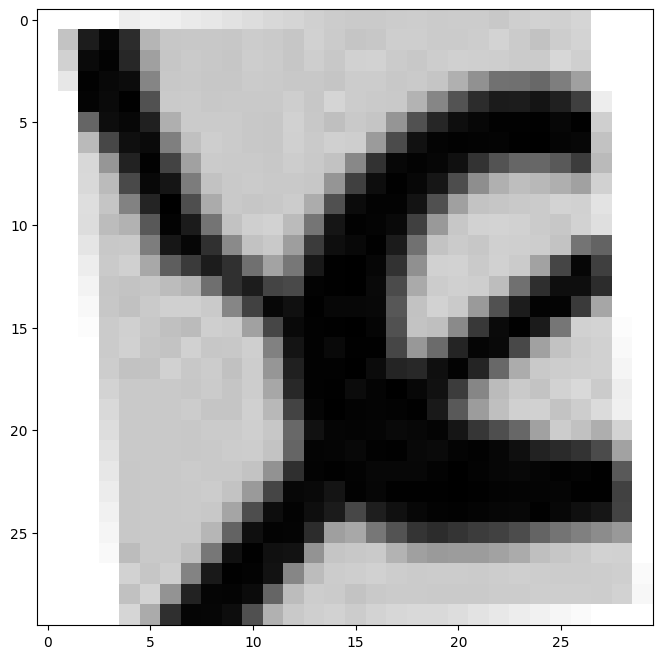

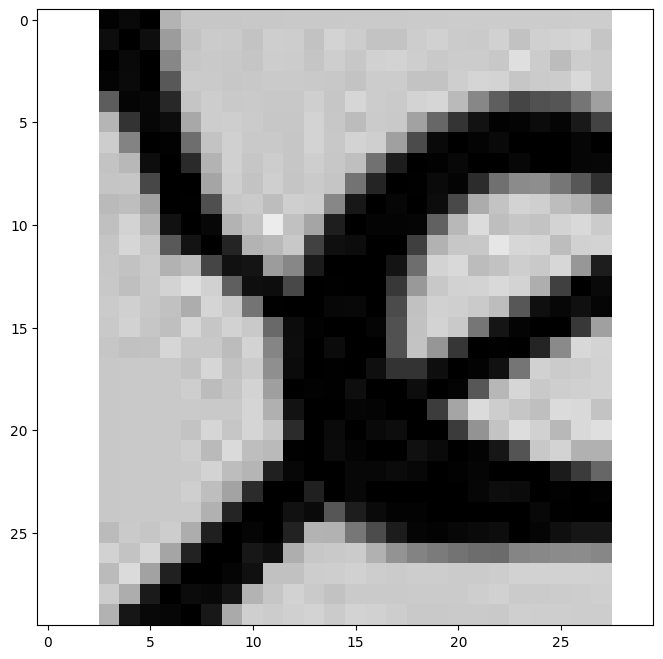

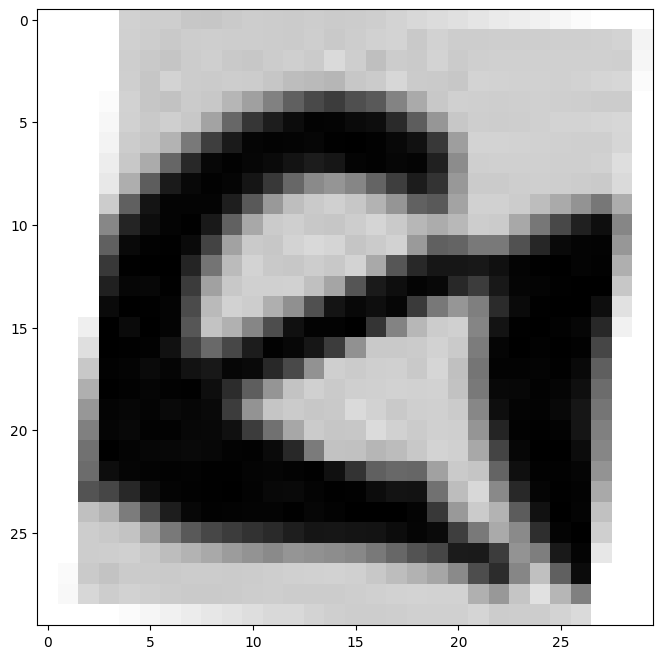

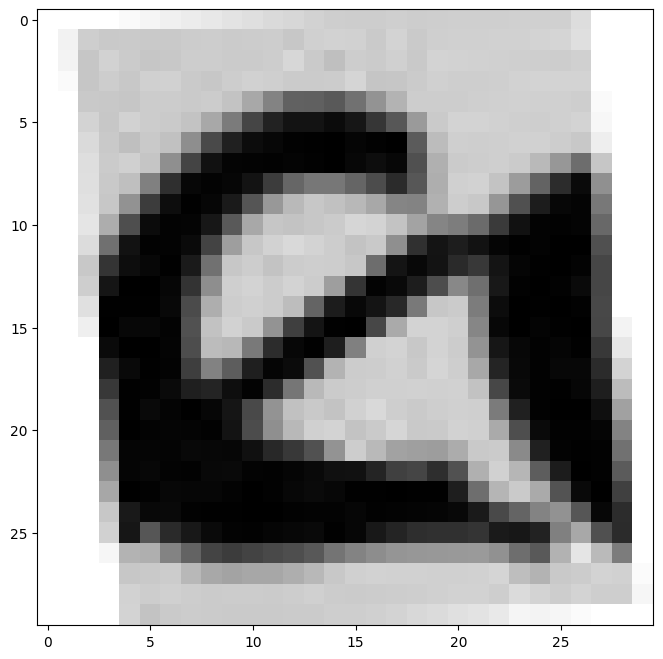

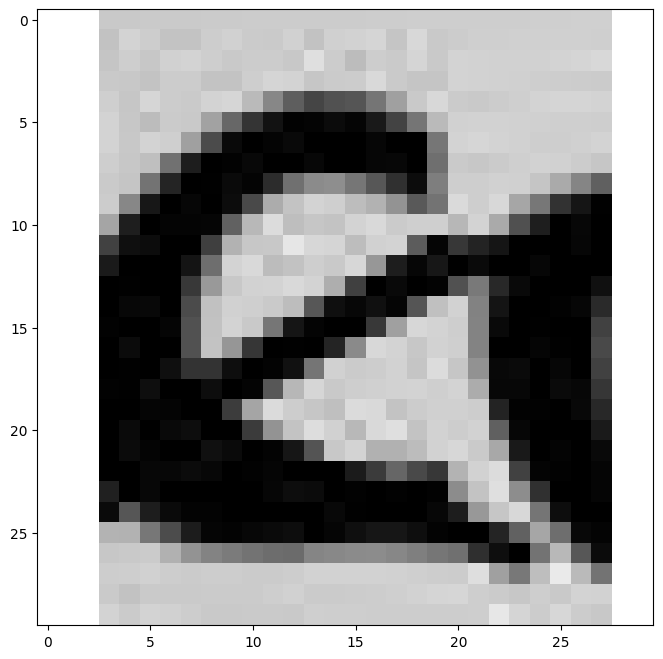

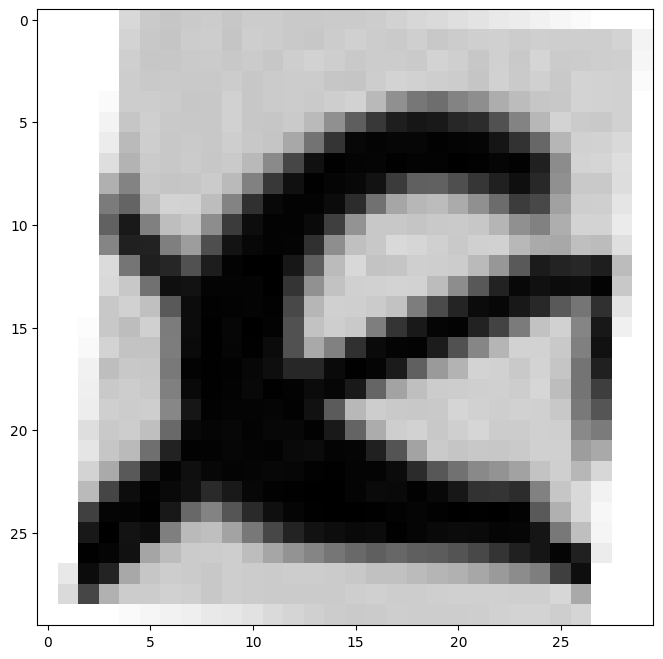

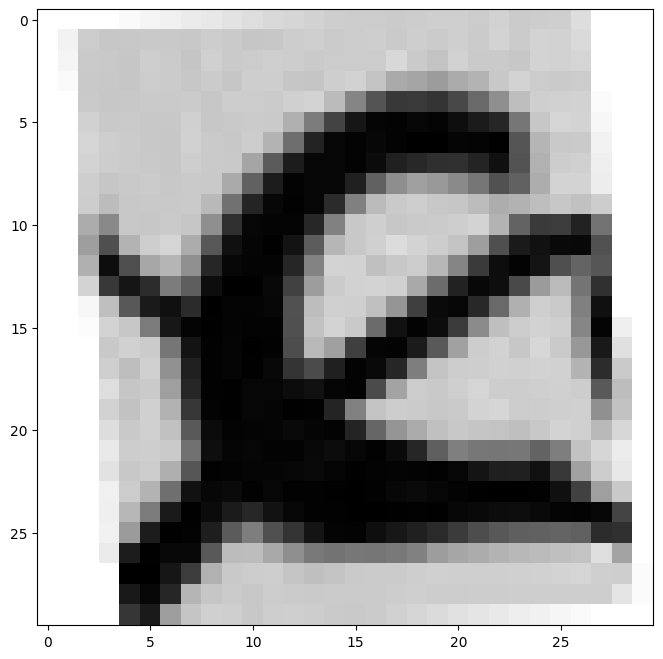

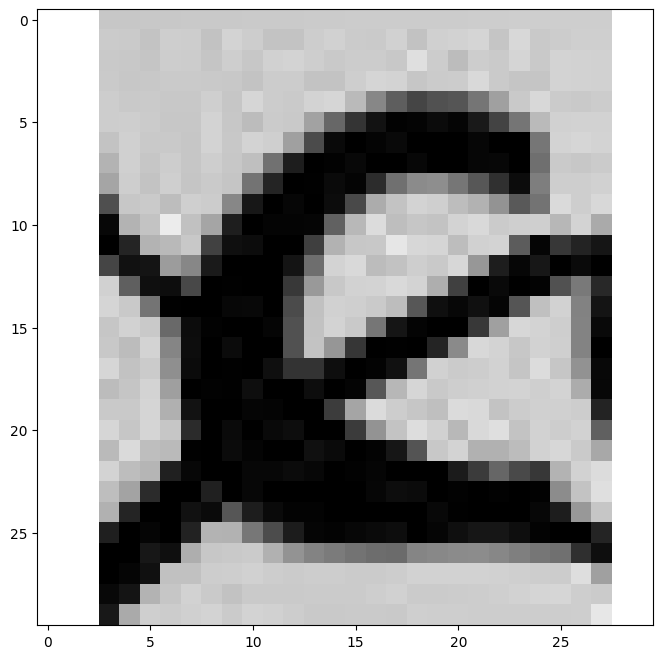

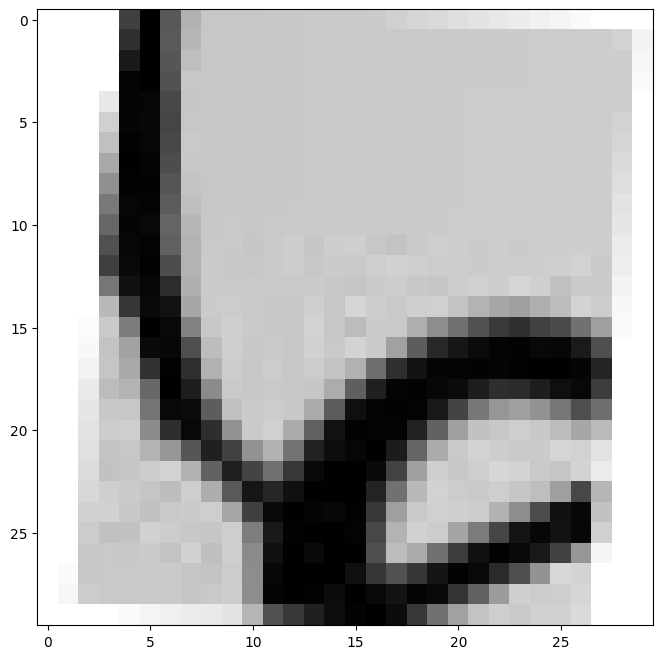

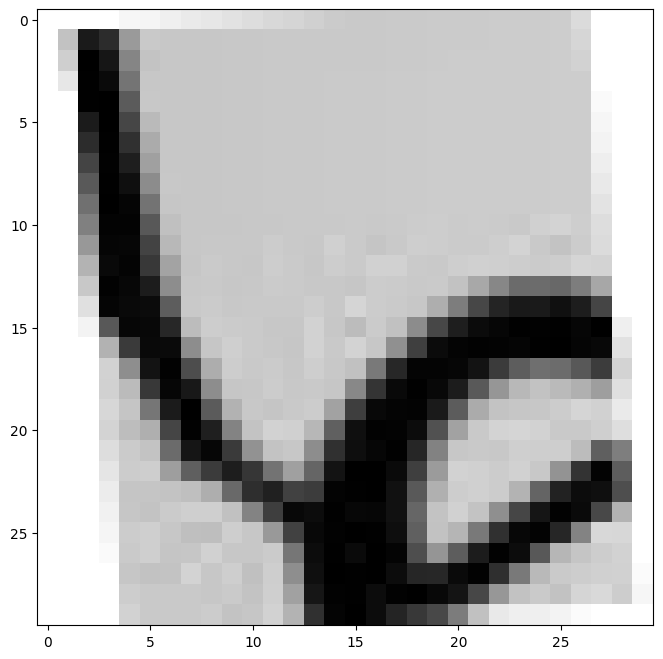

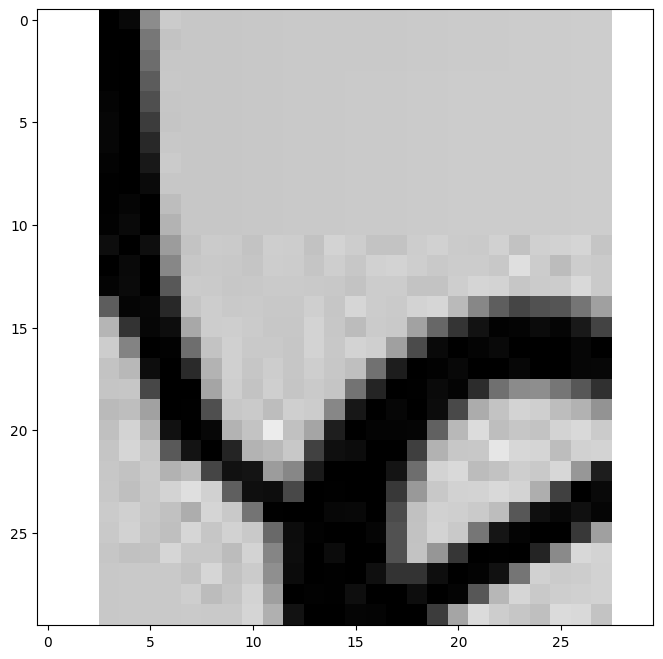

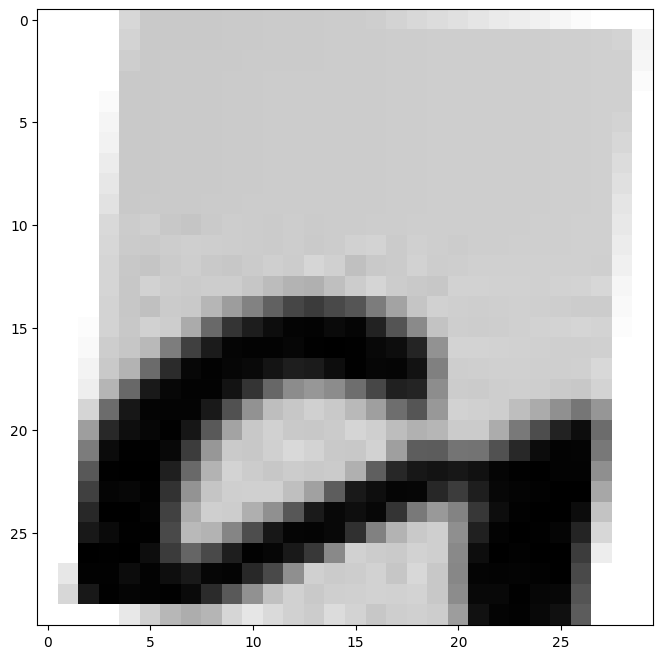

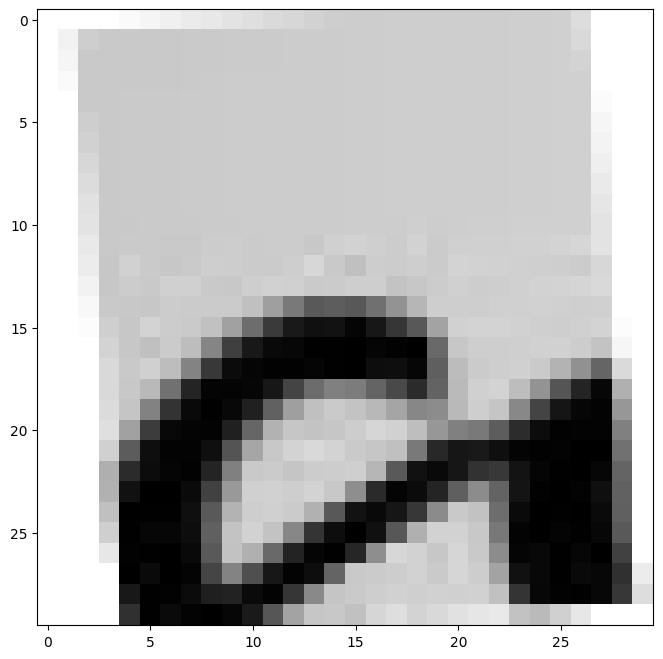

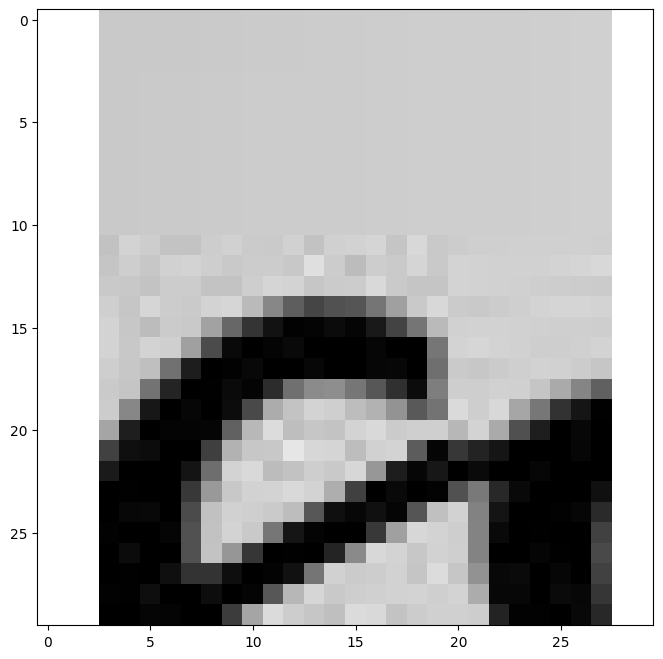

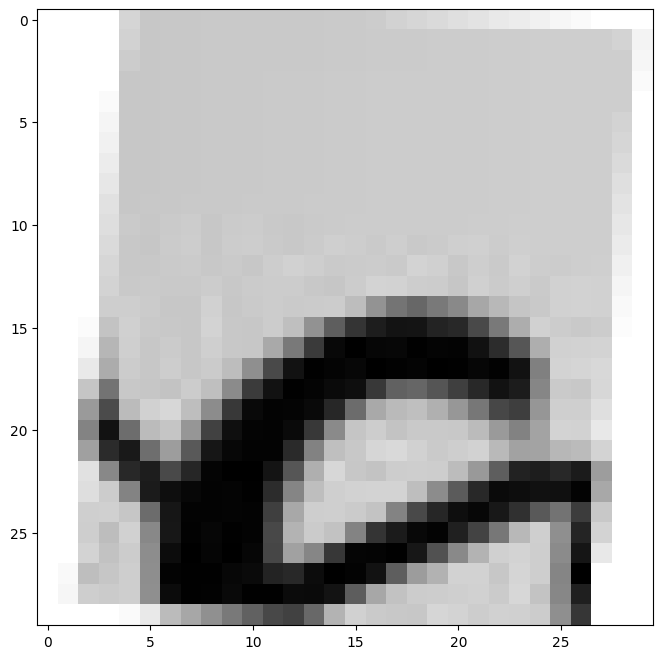

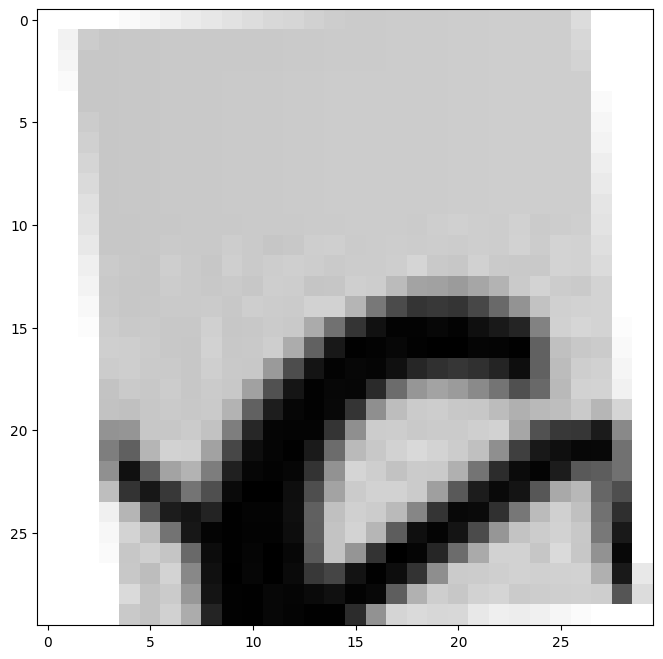

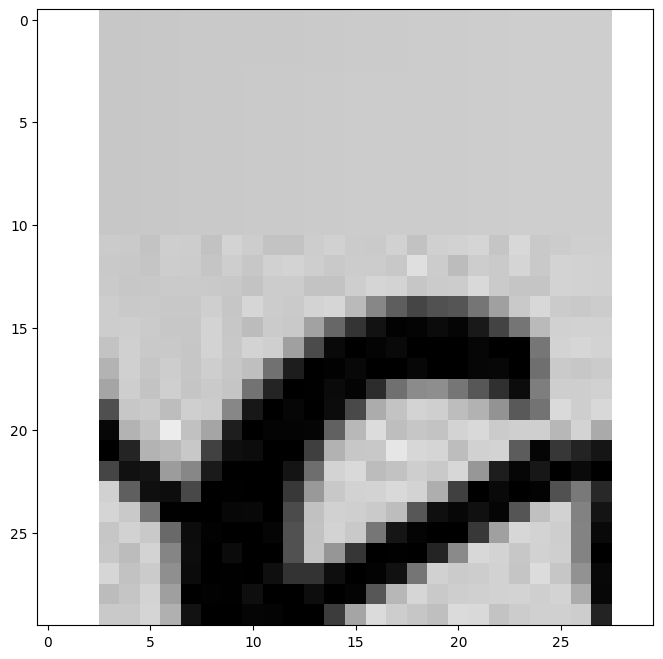

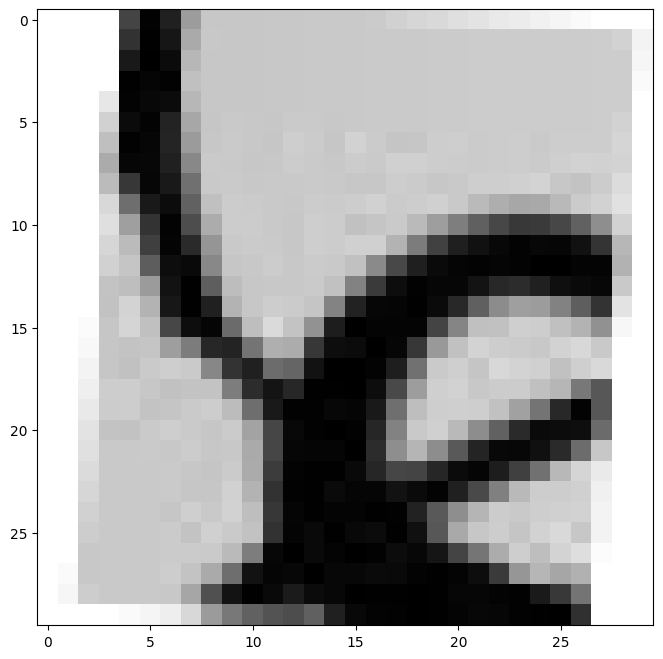

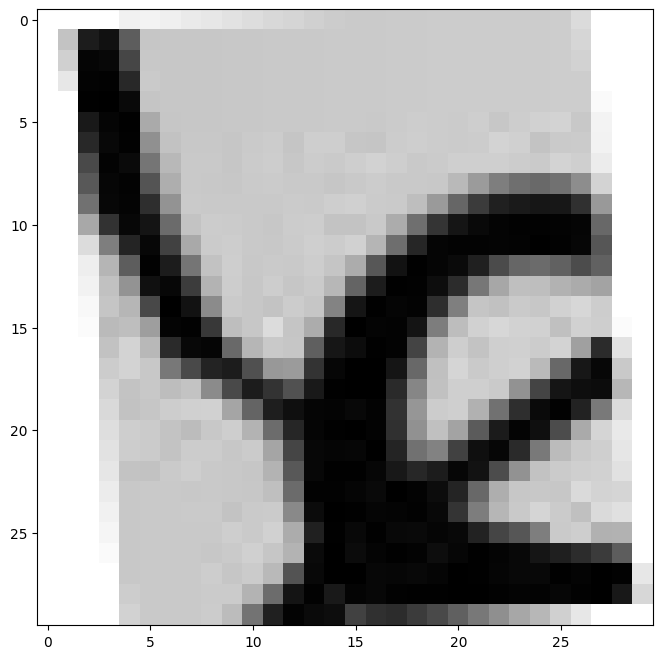

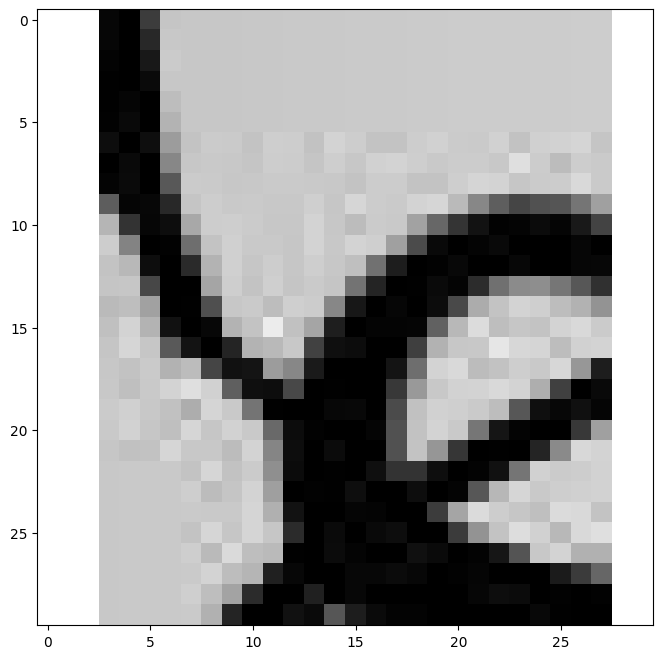

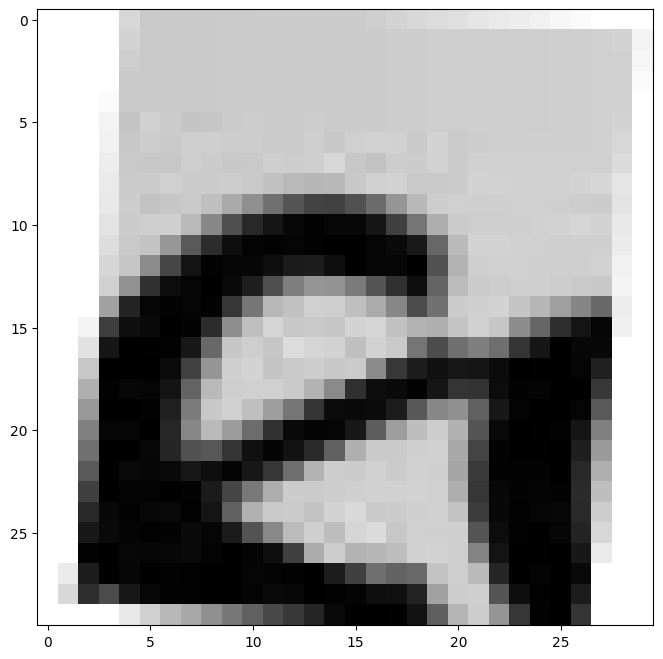

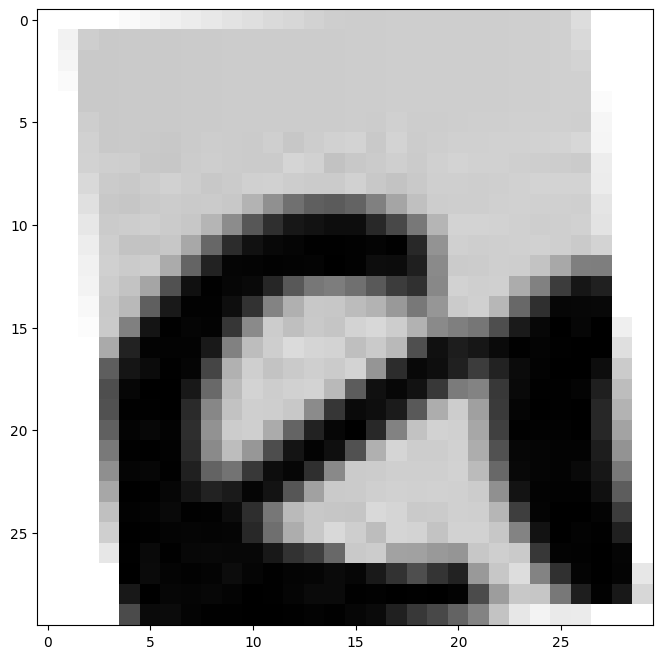

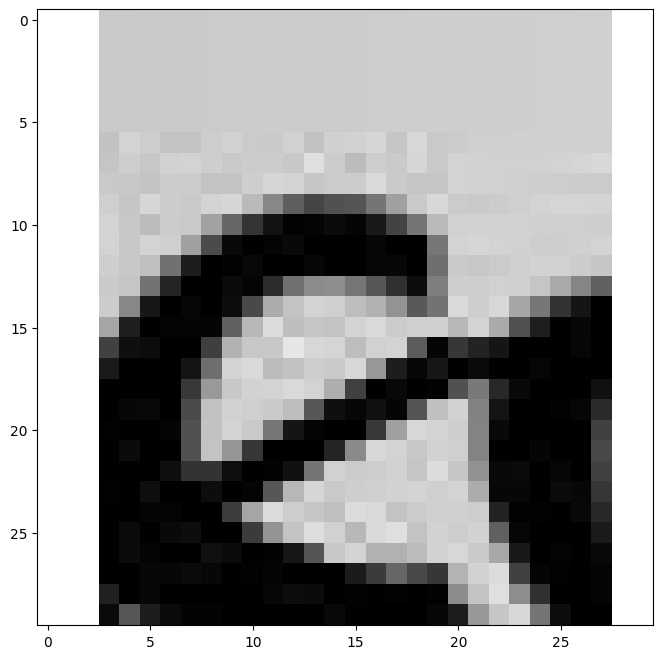

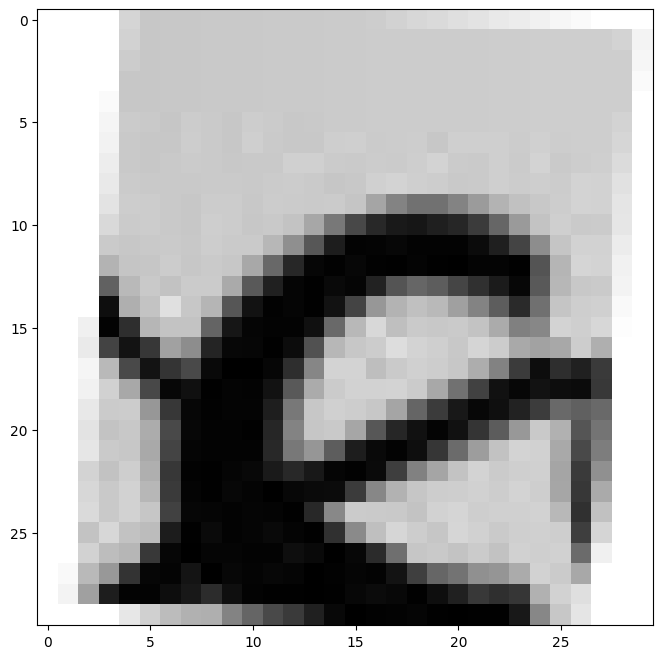

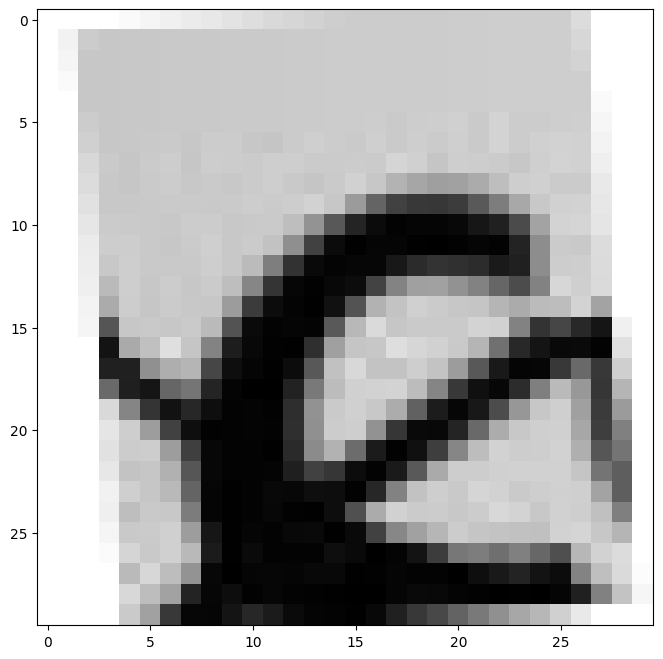

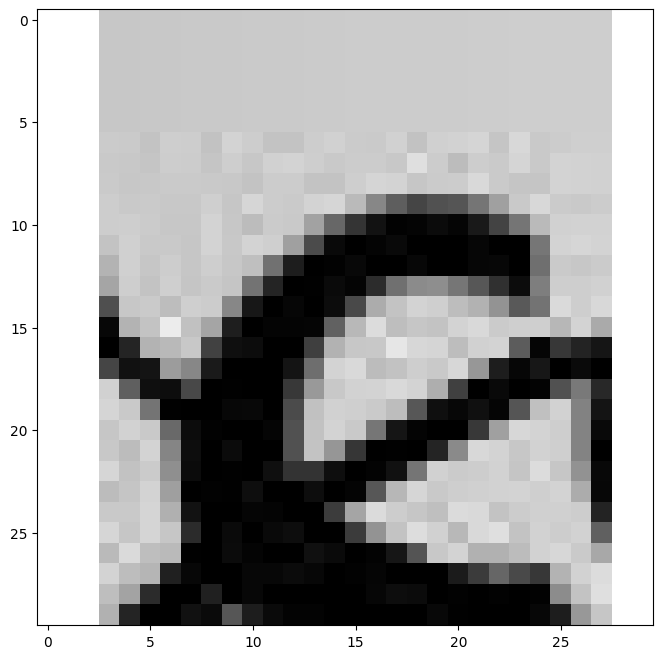

In [ ]:
for i in range(27):
  plt.imshow(train_data_seg[i], "gray")
  plt.show()

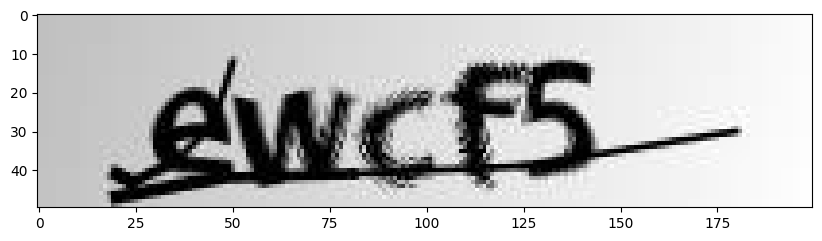

In [ ]:
plt.imshow(train_data[1], "gray")

In [ ]:
train_labels

['ccn2x',
 'ewcf5',
 'wxy4n',
 'xemyg',
 'y5g87',
 '4cfw8',
 'gc277',
 '573d8',
 '728n8',
 '5expp',
 'e46yw',
 '3bd8f',
 '44ype',
 'c4mcm',
 '36w25',
 'gpnxn',
 '2356g',
 'bm3p8',
 'd8xcn',
 'bp2d4',
 'fyfbn',
 'dmx8p',
 'fc2ff',
 '8c2wy',
 'pp87n',
 'deep5',
 'cwmny',
 'n7dyb',
 'nfcb5',
 'nfcwy',
 'wc2bd',
 '6xxdx',
 'c7gb3',
 '33ng4',
 'x8xnp',
 'n5wbg',
 'e7x45',
 '5bnd7',
 'bw5nf',
 'g2fnw',
 '4dgf7',
 'mdxpn',
 'pmd3w',
 'yx2d4',
 '87nym',
 'nf2n8',
 'b685n',
 '76353',
 'pm363',
 'fncnb',
 '5np4m',
 'dbpcd',
 'pwn5e',
 'g78gn',
 'yew6p',
 'myf82',
 'b5nmm',
 '7m8px',
 'y4n6m',
 '2fxgd',
 'feyc8',
 'nfd8g',
 '5fyem',
 'f83pn',
 'pnmxf',
 'c2yn8',
 'gn2d3',
 'g7wxw',
 '38n57',
 '662bw',
 '8b735',
 'c6we6',
 'b26nd',
 'pp546',
 'n7enn',
 'cffp4',
 'gy433',
 '2b827',
 '4cn7b',
 'ny3dw',
 'xbcbx',
 '7pcd7',
 'n6xc5',
 '445cc',
 '6cm6m',
 '7dyww',
 'c4527',
 'n7ff2',
 'ng756',
 'nbfx5',
 '2npg6',
 '7wn74',
 'gwn53',
 'd3c7y',
 '58b5m',
 '467d5',
 '387g2',
 'm3b5p',
 '7e2y7',
 '6mn8n',


one_hot encoding

In [ ]:
# Define the possible characters and their corresponding indices
character_counts = {'b': 0, 'c': 1, 'd': 2, 'e': 3, 'f': 4, 'g': 5, 'm': 6, 'n': 7, 'p': 8, 'w': 9, 'x': 10, 'y': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18}

# Number of unique characters
num_classes = len(character_counts)

# Function to perform one-hot encoding
def one_hot_encode(character):
    vector = np.zeros(num_classes)
    index = character_counts[character]
    vector[index] = 1
    return vector

# Create a list to hold the one-hot encoded labels
one_hot_encoded_train_labels_seg = []

# Iterate over the image_seg_labels and create one-hot encoded vectors
for label in train_labels_seg:
    character = label[0]  # Extract the first character
    one_hot_vector = one_hot_encode(character)
    one_hot_encoded_train_labels_seg.append(one_hot_vector)

# Convert the list to a numpy array for easier manipulation
one_hot_encoded_train_labels_seg = np.array(one_hot_encoded_train_labels_seg)

# Debug: Print the one-hot encoded labels to verify
print("One-hot encoded labels:")
print(one_hot_encoded_train_labels_seg)

# Debug: Print the shape of the one-hot encoded labels array
print("Shape of one-hot encoded labels array:", one_hot_encoded_train_labels_seg.shape)

One-hot encoded labels:
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of one-hot encoded labels array: (115560, 19)


In [ ]:
print(one_hot_encoded_train_labels_seg[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


CNN time now

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np
from sklearn.metrics import classification_report

# Convert train and test data to numpy arrays
train_data_seg = np.array(train_data_seg)
test_data_seg = np.array(test_data_seg)
one_hot_encoded_train_labels_seg = np.array(one_hot_encoded_train_labels_seg)
test_labels_seg = np.array(one_hot_encoded_test_labels_seg)

# Calculate the labels based on one-hot encoded labels
labels = np.argmax(one_hot_encoded_train_labels_seg, axis=1)

# Split training data into training and validation sets with stratified sampling
fold_train_data, fold_val_data, fold_train_labels, fold_val_labels = train_test_split(
    train_data_seg, one_hot_encoded_train_labels_seg, test_size=0.25, stratify=labels, random_state=42
)

# Normalize the training and validation data
fold_train_data = fold_train_data / 255.0
fold_val_data = fold_val_data / 255.0

# Add color channel
fold_train_data = fold_train_data.reshape(fold_train_data.shape[0], 30, 30, 1)
fold_val_data = fold_val_data.reshape(fold_val_data.shape[0], 30, 30, 1)

test_data_seg1 = test_data_seg

# Normalize the test data
test_data_seg1 = test_data_seg1 / 255.0

# Add color channel
test_data_seg1 = test_data_seg1.reshape(test_data_seg1.shape[0], 30, 30, 1)

214
bmxpe


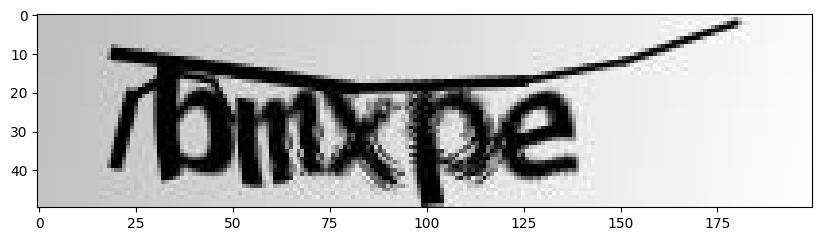

In [ ]:
m=60
print(len(test_data))
print(test_labels[m])
plt.imshow(test_data[m], "gray")

86670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


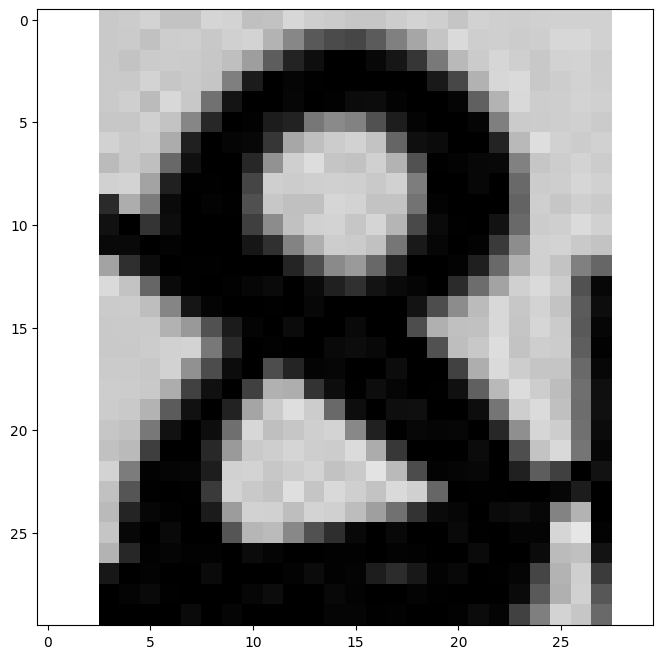

In [ ]:
print(len(fold_train_data))
print(fold_train_labels[0])
plt.imshow(fold_train_data[0], "gray")

28890
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


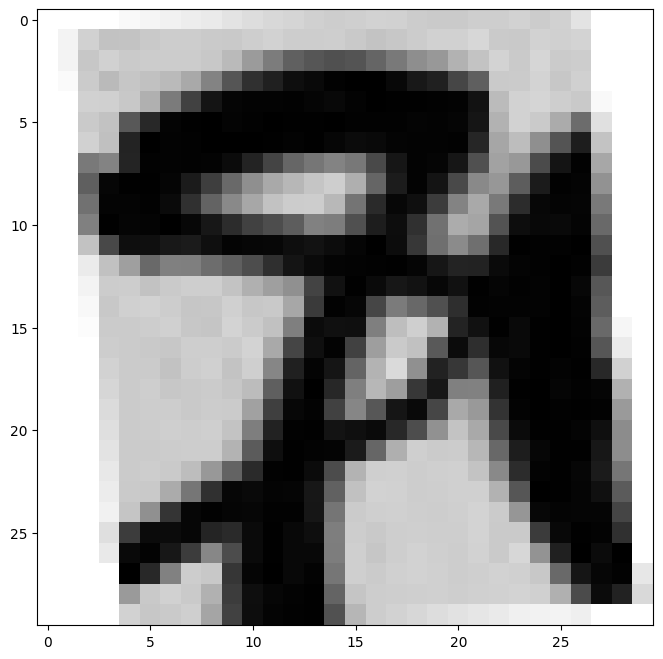

In [ ]:
print(len(fold_val_data))
print(fold_val_labels[0])
plt.imshow(fold_val_data[0], "gray")

data is split and it is time to make the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
#make model
model = Sequential()
# First Conv2D layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(30, 30, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Second Conv2D layer
model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Third Conv2D layer
model.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(19, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 27, 27, 32)        544       
                                                                 
 max_pooling2d_87 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_88 (Conv2D)          (None, 10, 10, 64)        32832     
                                                                 
 max_pooling2d_88 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_89 (Conv2D)          (None, 2, 2, 128)         131200    
                                                                 
 max_pooling2d_89 (MaxPooli  (None, 1, 1, 128)       

In [ ]:
# without k-fold
# history = model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

#with k-fold
history = model.fit(fold_train_data, fold_train_labels, epochs=1, validation_data=(fold_val_data, fold_val_labels))

2709/2709 [==============================] - 170s 62ms/step - loss: 0.8885 - accuracy: 0.7259 - val_loss: 0.4295 - val_accuracy: 0.8735


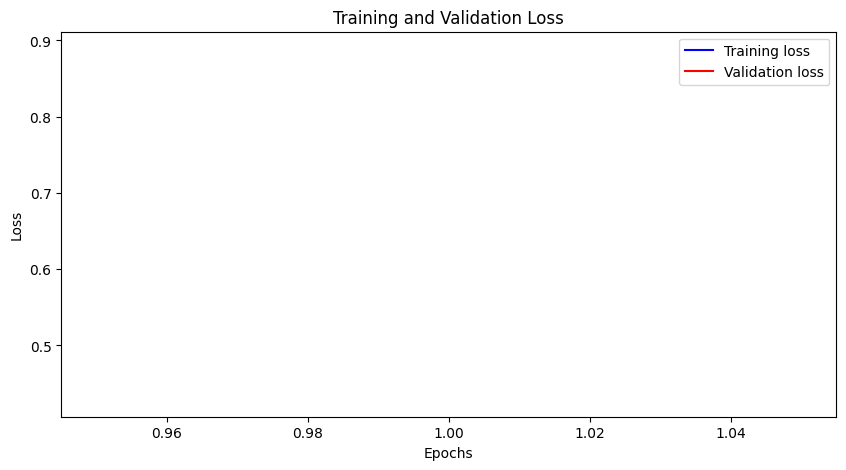

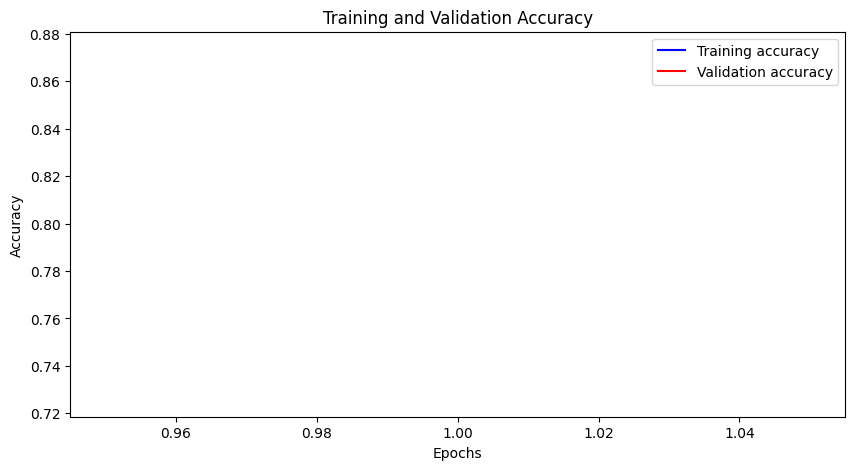

In [ ]:
# Assuming you have trained the model and stored the training history in the 'history' variable

# Get training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_data_seg1, test_labels_seg)

34/34 [==============================] - 1s 29ms/step - loss: 0.2454 - accuracy: 0.9280


[0.24542270600795746, 0.9280374050140381]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#predictions = model.predict(x_test)
predictions = np.argmax(model.predict(test_data_seg1), axis=-1)

34/34 [==============================] - 1s 25ms/step


In [ ]:
len(predictions)

1070

In [ ]:
test_labels_indexed = np.argmax(test_labels_seg, axis=1)
print(len(test_labels_indexed))

1070


In [ ]:
print(test_labels_indexed.shape)
print(predictions.shape)
print(predictions[1])

(1070,)
(1070,)
3


In [ ]:
print(classification_report(test_labels_indexed, predictions))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        59
           1       0.84      0.96      0.90        49
           2       0.98      1.00      0.99        49
           3       0.97      0.81      0.88        47
           4       1.00      0.98      0.99        49
           5       0.98      0.94      0.96        54
           6       1.00      0.88      0.94        77
           7       0.81      0.94      0.87       121
           8       0.80      0.86      0.83        56
           9       0.91      0.98      0.94        50
          10       0.94      0.98      0.96        46
          11       0.90      0.90      0.90        49
          12       0.93      0.98      0.95        52
          13       0.98      0.94      0.96        51
          14       0.96      0.95      0.96        58
          15       0.96      1.00      0.98        55
          16       1.00      0.96      0.98        55
          17       0.98    

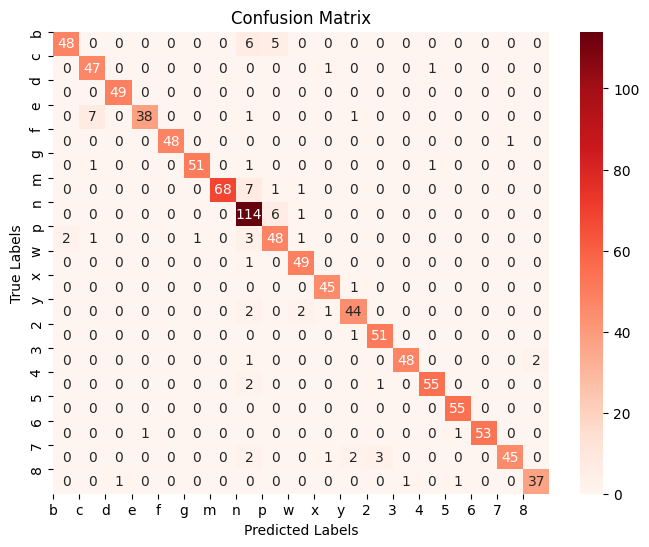

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
character_counts = {'b': 0, 'c': 1, 'd': 2, 'e': 3, 'f': 4, 'g': 5, 'm': 6, 'n': 7, 'p': 8, 'w': 9, 'x': 10, 'y': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18}

# Example predictions and actual labels (replace these with your own data)
predictions = predictions
actual_labels = test_labels_indexed

# Calculate confusion matrix
conf_matrix = confusion_matrix(actual_labels, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g')

# Customize x and y axis labels using character_counts dictionary keys
plt.xticks(ticks=range(len(character_counts)), labels=list(character_counts.keys()))
plt.yticks(ticks=range(len(character_counts)), labels=list(character_counts.keys()))

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show plot
plt.show()

evauluation

In [ ]:
def process_test(test_data, test_labels):
    # Create test_labels_seg array
  test_labels_seg = []
  for img_idx, label in enumerate(test_labels):
      for char_idx, char in enumerate(label):
          test_labels_seg.append(f"{char}{char_idx}{img_idx}")

  i = 0
  test_data_seg = []
  for testdata in test_data:
    img1 = process_image(test_data[i], i, "none", 0)
    i += 1
    for j in range(5):
      # Define the ROI (Region of Interest)
      pos = [[25, 50], [50, 75], [75, 100], [100, 125], [125, 150]]

      startY, endY = 10, 40  # Example values for the Y-axis
      startX, endX = pos[j]  # Example values for the X-axis

      # Extract the section of the image
      roi = img1[startY:endY, startX:endX]

      # Define the padding
      top = 0
      bottom = 0

      diff = 30 - (endX - startX)
      #print(diff - 1)

      if diff % 2 == 0:
        left = diff / 2
        right = diff / 2
      else:
        diff = diff - 1
        left = diff / 2 + 1
        right = diff / 2

      #print(left, right)
      # Add padding
      extended_image = cv2.copyMakeBorder(roi, 0, 0, int(left),int(right), cv2.BORDER_CONSTANT, value=[255, 255, 255])
      test_data_seg.append(extended_image)

  # Define the possible characters and their corresponding indices
  character_counts = {'b': 0, 'c': 1, 'd': 2, 'e': 3, 'f': 4, 'g': 5, 'm': 6, 'n': 7, 'p': 8, 'w': 9, 'x': 10, 'y': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18}

  # Number of unique characters
  num_classes = len(character_counts)

  # Function to perform one-hot encoding
  def one_hot_encode(character):
      vector = np.zeros(num_classes)
      index = character_counts[character]
      vector[index] = 1
      return vector

  # Create a list to hold the one-hot encoded labels
  one_hot_encoded_test_labels_seg = []

  # Iterate over the image_seg_labels and create one-hot encoded vectors
  for label in test_labels_seg:
      character = label[0]  # Extract the first character
      one_hot_vector = one_hot_encode(character)
      one_hot_encoded_test_labels_seg.append(one_hot_vector)

  # Convert the list to a numpy array for easier manipulation
  one_hot_encoded_test_labels_seg = np.array(one_hot_encoded_test_labels_seg)

  # Debug: Print the one-hot encoded labels to verify
  print("One-hot encoded labels:")
  print(one_hot_encoded_test_labels_seg)

  # Debug: Print the shape of the one-hot encoded labels array
  print("Shape of one-hot encoded labels array:", one_hot_encoded_test_labels_seg.shape)

  return test_data_seg, one_hot_encoded_test_labels_seg

In [ ]:
def process_train(train_data, train_labels):
  # Create image_seg_labels array with more variations
  train_labels_seg = []

  # Define the possible variations for each character
  # process_types = ['t', 'o', 'i', 'n']
  # segment_shifts = ['u', 'd', 'n']
  # image_shifts = ['l', 'r', 'n']
  # rotations = ['<', '>', 'n']

  process_types = ['n']
  segment_shifts = ['u', 'd', 'n']
  image_shifts = ['l', 'r', 'n']
  rotations = ['<', '>', 'n']

  for img_index, label in enumerate(train_labels):
      if not isinstance(label, str):
          print(f"Warning: The label at index {img_index} is not a string. Skipping this label.")
          continue

      for char_index, char in enumerate(label):
          if not isinstance(char, str) or len(char) != 1:
              print(f"Warning: The character at label index {img_index} and char index {char_index} is invalid. Skipping this character.")
              continue

          for process_type in process_types:
              for segment_shift in segment_shifts:
                  for image_shift in image_shifts:
                      for rotation in rotations:
                          train_labels_seg.append(f"{char}{char_index}{process_type}{segment_shift}{image_shift}{rotation}{img_index}")

  # Optional: Print the first few entries to verify
  print("First few entries in train_labels_seg:", train_labels_seg[:10])

  train_data_seg = []
  track = 0
  for seg in train_labels_seg:
    letter_index = int(seg[1])
    type_proc = seg[2]
    shift_vert = seg[3]
    shift_horz = seg[4]
    rotate = seg[5]
    label_index = int(seg[6:])

    #first process the image based on type_proc
    i = label_index
    #print(i)

    if type_proc == 't':
      img = process_image(train_data[i], i, process = "thresh1", display = 0)
    elif type_proc == 'o':
      img = process_image(train_data[i], i, process = "opening", display = 0)
    elif type_proc == 'i':
      img = process_image(train_data[i], i, process = "img_dilation", display = 0)
    else: img = process_image(train_data[i], i, process = "none", display = 0)

    #plt.imshow(img,"gray")
    #plt.show()

    #next decide to shift image verticaly or horizontally
    shift = [shift_vert,shift_horz]

    # Decide to shift image vertically or horizontally
    shift_values = []
    for k in [shift_vert, shift_horz]:
        if k == 'u' or k == 'r':
            shift_values.append(5)
        elif k == 'd' or k == 'l':
            shift_values.append(-5)
        else:
            shift_values.append(0)

    shift_vert_val, shift_horz_val = shift_values

    if rotate == '>':
      angle = 5
    elif rotate == '<':
      angle = -5
    else:
      angle = 0

    # Apply shift and rotation
    img_shifted = shift_image(img, shift_vert_val, shift_horz_val, letter_index)
    img_fin = rotate_image(img_shifted, angle)

    track += 1
    print("Current point is " + str(track) + ". Only " + str(len(train_labels_seg) - track) + " left.")
    train_data_seg.append(img_fin)

    # Define the possible characters and their corresponding indices
  character_counts = {'b': 0, 'c': 1, 'd': 2, 'e': 3, 'f': 4, 'g': 5, 'm': 6, 'n': 7, 'p': 8, 'w': 9, 'x': 10, 'y': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18}

  # Number of unique characters
  num_classes = len(character_counts)

  # Function to perform one-hot encoding
  def one_hot_encode(character):
      vector = np.zeros(num_classes)
      index = character_counts[character]
      vector[index] = 1
      return vector

  # Create a list to hold the one-hot encoded labels
  one_hot_encoded_train_labels_seg = []

  # Iterate over the image_seg_labels and create one-hot encoded vectors
  for label in train_labels_seg:
      character = label[0]  # Extract the first character
      one_hot_vector = one_hot_encode(character)
      one_hot_encoded_train_labels_seg.append(one_hot_vector)

  # Convert the list to a numpy array for easier manipulation
  one_hot_encoded_train_labels_seg = np.array(one_hot_encoded_train_labels_seg)

  # Debug: Print the one-hot encoded labels to verify
  print("One-hot encoded labels:")
  print(one_hot_encoded_train_labels_seg)

  # Debug: Print the shape of the one-hot encoded labels array
  print("Shape of one-hot encoded labels array:", one_hot_encoded_train_labels_seg.shape)

  return train_data_seg, one_hot_encoded_train_labels_seg

In [ ]:
def split_train_test(image_data, image_labels, random_state):
    train_data, test_data, train_labels, test_labels = train_test_split(image_data, image_labels, test_size=0.2, random_state=random_state)
    test_data_seg, one_hot_encoded_test_labels_seg = process_test(test_data, test_labels)
    train_data_seg, one_hot_encoded_train_labels_seg = process_train(train_data, train_labels)
    return train_data_seg, one_hot_encoded_train_labels_seg, test_data_seg, one_hot_encoded_test_labels_seg

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np
from sklearn.metrics import classification_report
def generate_data(random_state, num, train_data_seg, one_hot_encoded_train_labels_seg, test_data_seg, one_hot_encoded_test_labels_seg):

    train_data_seg = np.array(train_data_seg)
    test_data_seg = np.array(test_data_seg)
    one_hot_encoded_train_labels_seg = np.array(one_hot_encoded_train_labels_seg)
    one_hot_encoded_test_labels_seg = np.array(one_hot_encoded_test_labels_seg)

    test_data = test_data_seg

    # Normalize the test data
    test_data = test_data / 255.0

    # Add color channel
    test_data = test_data.reshape(test_data.shape[0], 30, 30, 1)

    # rename
    test_labels = one_hot_encoded_test_labels_seg

    # Calculate the labels based on one-hot encoded labels
    labels = np.argmax(one_hot_encoded_train_labels_seg, axis=1)
    data = np.array(train_data_seg)

    # Initialize StratifiedKFold with the desired number of folds
    num_folds = 4
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=random_state)

    # Loop over the folds
    for fold, (train_index, val_index) in enumerate(skf.split(data, labels)):
        print(f"Processing fold {fold + 1}")

        # Split data into training and validation sets for this fold
        fold_train_data, fold_val_data = train_data_seg[train_index], train_data_seg[val_index]
        fold_train_labels, fold_val_labels = one_hot_encoded_train_labels_seg[train_index], one_hot_encoded_train_labels_seg[val_index]

        # Normalize the training and validation data
        fold_train_data = fold_train_data / 255.0
        fold_val_data = fold_val_data / 255.0

        # Add color channel
        fold_train_data = fold_train_data.reshape(fold_train_data.shape[0], 30, 30, 1)
        fold_val_data = fold_val_data.reshape(fold_val_data.shape[0], 30, 30, 1)

        if num == fold: break

    return test_data, test_labels, fold_train_data, fold_train_labels, fold_val_data, fold_val_labels

In [ ]:
train_data_seg, one_hot_encoded_train_labels_seg, test_data_seg, one_hot_encoded_test_labels_seg = split_train_test(image_data, image_labels, 1)

Streaming output truncated to the last 5000 lines.
Current point is 110570. Only 4990 left.
Current point is 110571. Only 4989 left.
Current point is 110572. Only 4988 left.
Current point is 110573. Only 4987 left.
Current point is 110574. Only 4986 left.
Current point is 110575. Only 4985 left.
Current point is 110576. Only 4984 left.
Current point is 110577. Only 4983 left.
Current point is 110578. Only 4982 left.
Current point is 110579. Only 4981 left.
Current point is 110580. Only 4980 left.
Current point is 110581. Only 4979 left.
Current point is 110582. Only 4978 left.
Current point is 110583. Only 4977 left.
Current point is 110584. Only 4976 left.
Current point is 110585. Only 4975 left.
Current point is 110586. Only 4974 left.
Current point is 110587. Only 4973 left.
Current point is 110588. Only 4972 left.
Current point is 110589. Only 4971 left.
Current point is 110590. Only 4970 left.
Current point is 110591. Only 4969 left.
Current point is 110592. Only 4968 left.
Curren

In [ ]:
test_data, test_labels, fold_train_data, fold_train_labels, fold_val_data, fold_val_labels = generate_data(1, 1, train_data_seg, one_hot_encoded_train_labels_seg, test_data_seg, one_hot_encoded_test_labels_seg)

Processing fold 1
Processing fold 2


In [ ]:
print(len(train_data_seg))
print(len(fold_train_data))
print(len(test_data_seg))

115560
86670
1070


In [ ]:
# from sklearn.model_selection import train_test_split, StratifiedKFold
# import numpy as np
# from sklearn.metrics import classification_report
# def generate_data(random_state, train_data_seg, test_data_seg, one_hot_encoded_train_labels_seg, one_hot_encoded_test_labels_seg):
#     # Convert train and test data to numpy arrays
#     # train_data_seg = np.array(train_data_seg)
#     # test_data_seg = np.array(test_data_seg)
#     # one_hot_encoded_train_labels_seg = np.array(one_hot_encoded_train_labels_seg)
#     # one_hot_encoded_test_labels_seg = np.array(one_hot_encoded_test_labels_seg)

#     # Define the number of folds
#     k = 5

#     # Initialize the StratifiedKFold object
#     skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=random_state)

#     # print(one_hot_encoded_train_labels_seg[1])

#     # print(train_data_seg.shape)
#     # plt.imshow(train_data_seg[1],"gray")

#     # Loop over the folds
#     for fold, (train_index, val_index) in enumerate(skf.split(train_data_seg, np.argmax(one_hot_encoded_train_labels_seg, axis=1))):
#         print(f"Processing fold {fold + 1}/{k}")

#         # Split data into training and validation sets for this fold
#         fold_train_data, fold_val_data = train_data_seg[train_index], train_data_seg[val_index]
#         fold_train_labels, fold_val_labels = one_hot_encoded_train_labels_seg[train_index], one_hot_encoded_train_labels_seg[val_index]

#             # Further split fold_train_data into train and validation (75/25 split)
#         fold_train_data, fold_fold_val_data, fold_train_labels, fold_fold_val_labels = train_test_split(
#             fold_train_data, fold_train_labels, test_size=0.25, stratify=np.argmax(fold_train_labels, axis=1), random_state=random_state
#         )

#         # Normalize the training and validation data
#         fold_train_data = fold_train_data / 255.0
#         fold_val_data = fold_val_data / 255.0

#         # Add color channel
#         fold_train_data = fold_train_data.reshape(fold_train_data.shape[0], 30, 30, 1)
#         fold_val_data = fold_val_data.reshape(fold_val_data.shape[0], 30, 30, 1)

#         # Your model training and evaluation code here
#         # Example: model.fit(fold_train_data, fold_train_labels)
#         # Example: val_predictions = model.predict(fold_val_data)
#         # Example: print(classification_report(np.argmax(fold_val_labels, axis=1), np.argmax(val_predictions, axis=1)))

#     # # Normalize the test data
#     # test_data_seg = test_data_seg / 255.0

#     # # Add color channel
#     # test_data_seg = test_data_seg.reshape(test_data_seg.shape[0], 30, 30, 1)

#     return test_data_seg, one_hot_encoded_test_labels_seg, fold_train_data, fold_train_labels, fold_val_data, fold_val_labels

#     # After training on all folds, you can evaluate the final model on the test data
#     # Example: test_predictions = model.predict(test_data)
#     # Example: print(classification_report(np.argmax(test_labels, axis=1), np.argmax(test_predictions, axis=1)))

In [ ]:
    # #make model
    # model = Sequential()
    # # First Conv2D layer
    # model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(30, 30, 1), activation='relu'))
    # model.add(MaxPool2D(pool_size=(2,2)))

    # # Second Conv2D layer
    # model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu'))
    # model.add(MaxPool2D(pool_size=(2,2)))

    # # Third Conv2D layer
    # model.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu'))
    # model.add(MaxPool2D(pool_size=(2,2)))

    # model.add(Flatten())

    # model.add(Dense(512, activation = 'relu'))
    # model.add(Dense(512, activation = 'relu'))
    # model.add(Dense(512, activation = 'relu'))
    # model.add(Dense(19, activation = 'softmax'))
    # model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

In [ ]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

n_outer =  1 # this should be 10 for the "10"x 10 CV, you could use a smaller values, say 2, for prototyping
n_splits = 1 # this should be 10 for the 10 x "10" CV, you could use a smaller values, say 2, for prototyping
acc_outer_CNN1 = []
f1_outer_CNN1  = []
mcc_outer_CNN1  = []

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten



for i_outer in range(0,n_outer):

  print('#### Outer Iteration {} of {}'.format(i_outer+1,n_outer))
  #generate the data

  train_data_seg, one_hot_encoded_train_labels_seg, test_data_seg, one_hot_encoded_test_labels_seg = split_train_test(image_data, image_labels, i_outer)

  for i_inner in range(0,n_splits):
    print('#### Inner Iteration {} of {}'.format(i_inner+1,n_splits))
    #create the data
    test_data, test_labels, fold_train_data, fold_train_labels, fold_val_data, fold_val_labels = generate_data(i_outer, i_inner, train_data_seg, one_hot_encoded_train_labels_seg, test_data_seg, one_hot_encoded_test_labels_seg)
    #make model
    model = Sequential()
    # First Conv2D layer
    model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(30, 30, 1), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    # Second Conv2D layer
    model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    # Third Conv2D layer
    model.add(Conv2D(filters=128, kernel_size=(4,4), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(19, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

    #train the model based on the data
    history = model.fit(fold_train_data, fold_train_labels, epochs=1, validation_data=(fold_val_data, fold_val_labels))
    #evaluate the model
    model.evaluate(test_data,test_labels)
    predictions = np.argmax(model.predict(test_data), axis=-1)
    test_labels_indexed = np.argmax(test_labels, axis=1)

    acc = accuracy_score(test_labels_indexed,predictions)
    f1 = f1_score(test_labels_indexed,predictions,average='macro')
    mcc = matthews_corrcoef(test_labels_indexed,predictions)

    acc_outer_CNN1.append(acc)
    f1_outer_CNN1.append(f1)
    mcc_outer_CNN1.append(mcc)

print('SVM Outer accuracy M = {:.2f}, SD = {:.4f}'.format(np.mean(acc_outer_CNN1)*100,np.std(acc_outer_CNN1)*100))
print('SVM Outer F1-Score M = {:.3f}, SD = {:.4f}'.format(np.mean(f1_outer_CNN1),np.std(f1_outer_CNN1)))
print('SVM Outer MCC      M = {:.3f}, SD = {:.4f}'.format(np.mean(mcc_outer_CNN1),np.std(mcc_outer_CNN1)))

Streaming output truncated to the last 5000 lines.
Current point is 110578. Only 4982 left.
Current point is 110579. Only 4981 left.
Current point is 110580. Only 4980 left.
Current point is 110581. Only 4979 left.
Current point is 110582. Only 4978 left.
Current point is 110583. Only 4977 left.
Current point is 110584. Only 4976 left.
Current point is 110585. Only 4975 left.
Current point is 110586. Only 4974 left.
Current point is 110587. Only 4973 left.
Current point is 110588. Only 4972 left.
Current point is 110589. Only 4971 left.
Current point is 110590. Only 4970 left.
Current point is 110591. Only 4969 left.
Current point is 110592. Only 4968 left.
Current point is 110593. Only 4967 left.
Current point is 110594. Only 4966 left.
Current point is 110595. Only 4965 left.
Current point is 110596. Only 4964 left.
Current point is 110597. Only 4963 left.
Current point is 110598. Only 4962 left.
Current point is 110599. Only 4961 left.
Current point is 110600. Only 4960 left.
Curren

In [ ]:
#others
# Multiply each value by 100 to convert them to percentages
acc_outer_CNN_percent = np.array(acc_outer_CNN1) * 100
f1_outer_CNN_percent = np.array(f1_outer_CNN1) * 100
mcc_outer_CNN_percent = np.array(mcc_outer_CNN1) * 100

# Calculate and print the standard deviation and mean for each metric in percentage
print("Accuracy:")
print("Mean:", np.mean(acc_outer_CNN_percent))
print("Standard Deviation:", np.std(acc_outer_CNN_percent))
print()

print("F1-Score:")
print("Mean:", np.mean(f1_outer_CNN_percent))
print("Standard Deviation:", np.std(f1_outer_CNN_percent))
print()

print("MCC:")
print("Mean:", np.mean(mcc_outer_CNN_percent))
print("Standard Deviation:", np.std(mcc_outer_CNN_percent))

Accuracy:
Mean: 90.8411214953271
Standard Deviation: 0.0

F1-Score:
Mean: 91.39984456417145
Standard Deviation: 0.0

MCC:
Mean: 90.32022189668601
Standard Deviation: 0.0


In [ ]:
from scipy import stats
normstat = stats.kstest(np.append(acc_outer_CNN,acc_outer_CNN1),'norm')
print(normstat)
print(stats.ttest_ind(acc_outer_CNN,acc_outer_CNN1))
print(stats.ttest_ind(f1_outer_CNN,f1_outer_CNN1))
print(stats.ttest_ind(mcc_outer_CNN,mcc_outer_CNN1))

KstestResult(statistic=0.7974959274128823, pvalue=5.870227082791222e-06, statistic_location=0.8327102803738318, statistic_sign=-1)
TtestResult(statistic=-8.017448062759948, pvalue=0.00020101919501389366, df=6.0)
TtestResult(statistic=-9.293634923506357, pvalue=8.781340991887468e-05, df=6.0)
TtestResult(statistic=-8.057693149368829, pvalue=0.0001955070866391072, df=6.0)


Running small test to see how model can solve captcha

In [ ]:
file_names_perfrom = file_names_full[-70:] # get the last 70 labels

In [ ]:
print(len(file_names_perfrom))

70


In [ ]:
# Extract labels from filenames
image_labels_perform = []
for filename in file_names_perfrom:
    # Assuming filenames have the format "ABCDE_image.jpg", where "ABCDE" is the label
    label = filename.split('_')[0][:5]  # Extract the first five characters before the first underscore
    image_labels_perform.append(label)

image_data_perform = []
for filename in file_names_perfrom:
    #getting the image data and storing it \
    #print(filename)
    name = "/content/drive/MyDrive/Project/samples/"+filename
    image_data_perform.append(cv2.imread(name,0))

In [ ]:
print(len(image_labels_perform))
print(len(image_data_perform))

70
70


In [ ]:
# Create test_labels_seg array
test_labels_seg_perform = []
for img_idx, label in enumerate(image_labels_perform):
    for char_idx, char in enumerate(label):
        test_labels_seg_perform.append(f"{char}{char_idx}{img_idx}")

In [ ]:
print(len(test_labels_seg_perform))

350


In [ ]:
i = 0
test_data_seg_perform = []
for testdata in image_data_perform:
  img1 = process_image(image_data_perform[i], i, "none", 0)
  i += 1
  for j in range(5):
    # Define the ROI (Region of Interest)
    pos = [[25, 50], [50, 75], [75, 100], [100, 125], [125, 150]]

    startY, endY = 10, 40  # Example values for the Y-axis
    startX, endX = pos[j]  # Example values for the X-axis

    # Extract the section of the image
    roi = img1[startY:endY, startX:endX]

    # Define the padding
    top = 0
    bottom = 0

    diff = 30 - (endX - startX)
    #print(diff - 1)

    if diff % 2 == 0:
      left = diff / 2
      right = diff / 2
    else:
      diff = diff - 1
      left = diff / 2 + 1
      right = diff / 2

    #print(left, right)
    # Add padding
    extended_image = cv2.copyMakeBorder(roi, 0, 0, int(left),int(right), cv2.BORDER_CONSTANT, value=[255, 255, 255])
    test_data_seg_perform.append(extended_image)

350


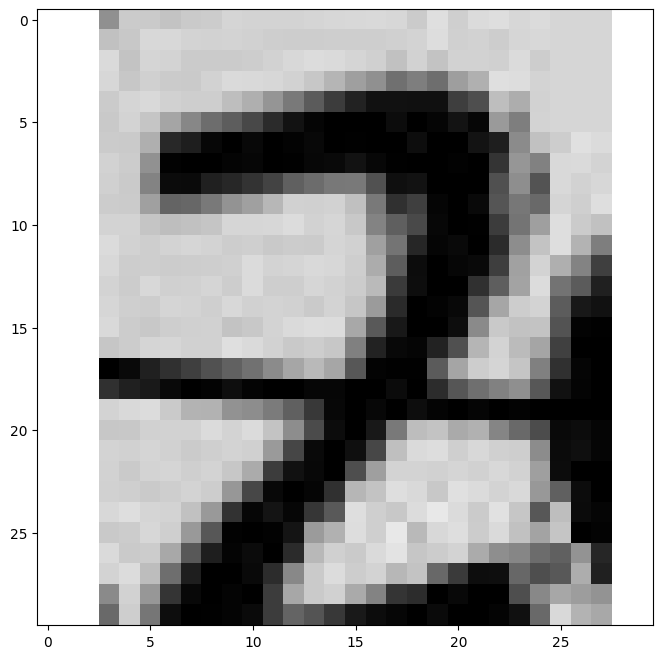

In [ ]:
print(len(test_data_seg_perform))
plt.imshow(test_data_seg_perform[1], "gray")

In [ ]:
# Define the possible characters and their corresponding indices
character_counts = {'b': 0, 'c': 1, 'd': 2, 'e': 3, 'f': 4, 'g': 5, 'm': 6, 'n': 7, 'p': 8, 'w': 9, 'x': 10, 'y': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18}

# Number of unique characters
num_classes = len(character_counts)

# Function to perform one-hot encoding
def one_hot_encode(character):
    vector = np.zeros(num_classes)
    index = character_counts[character]
    vector[index] = 1
    return vector

# Create a list to hold the one-hot encoded labels
one_hot_encoded_test_labels_seg_perform = []

# Iterate over the image_seg_labels and create one-hot encoded vectors
for label in test_labels_seg_perform:
    character = label[0]  # Extract the first character
    one_hot_vector = one_hot_encode(character)
    one_hot_encoded_test_labels_seg_perform.append(one_hot_vector)

# Convert the list to a numpy array for easier manipulation
one_hot_encoded_test_labels_seg_perform = np.array(one_hot_encoded_test_labels_seg_perform)

# Debug: Print the one-hot encoded labels to verify
print("One-hot encoded labels:")
print(one_hot_encoded_test_labels_seg_perform)

# Debug: Print the shape of the one-hot encoded labels array
print("Shape of one-hot encoded labels array:", one_hot_encoded_test_labels_seg_perform.shape)

One-hot encoded labels:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of one-hot encoded labels array: (350, 19)


In [ ]:
#don't touch this, ok
test_data_seg_perform = np.array(test_data_seg_perform)

# Normalize the test data
test_data_seg_perform = test_data_seg_perform / 255.0

# Add color channel
test_data_seg_perform = test_data_seg_perform.reshape(test_data_seg_perform.shape[0], 30, 30, 1)

In [ ]:
model.evaluate(test_data_seg_perform,one_hot_encoded_test_labels_seg_perform)
#predictions = model.predict(x_test)
predictions = np.argmax(model.predict(test_data_seg_perform), axis=-1)
test_labels_indexed = np.argmax(one_hot_encoded_test_labels_seg_perform, axis=1)
print(len(test_labels_indexed))

11/11 [==============================] - 0s 10ms/step
350


Demo here - allows you to look at a sample and see the prediction the model mode for it. Allows you to get an idea of what the model is looking it at and why it made incorrect predictions

In [ ]:
choice = 60;

368y5


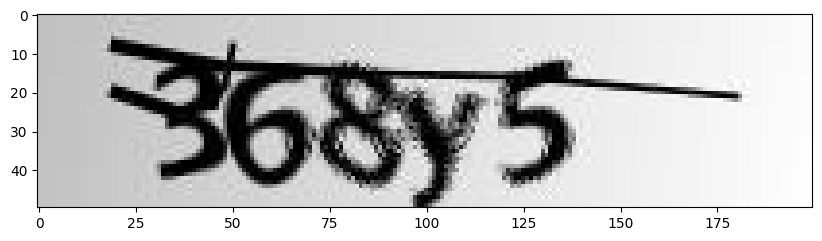

In [ ]:
print(image_labels_perform[choice])
plt.imshow(image_data_perform[choice], "gray")

3060


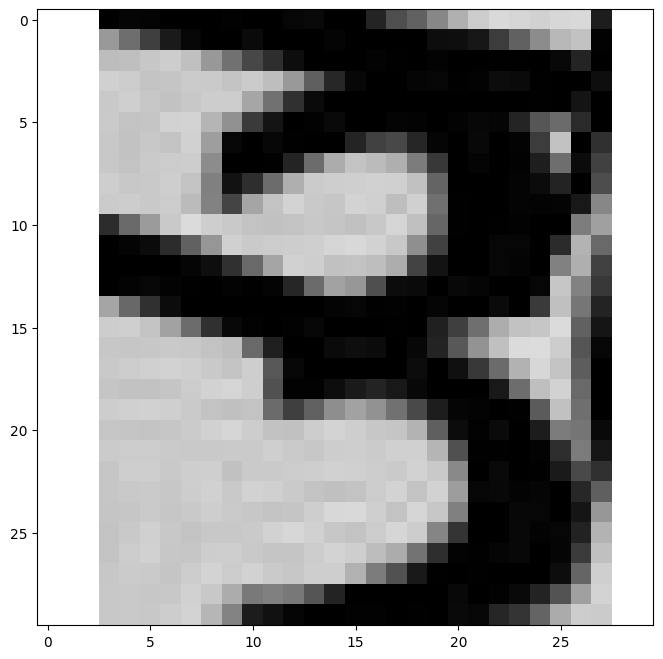

6160


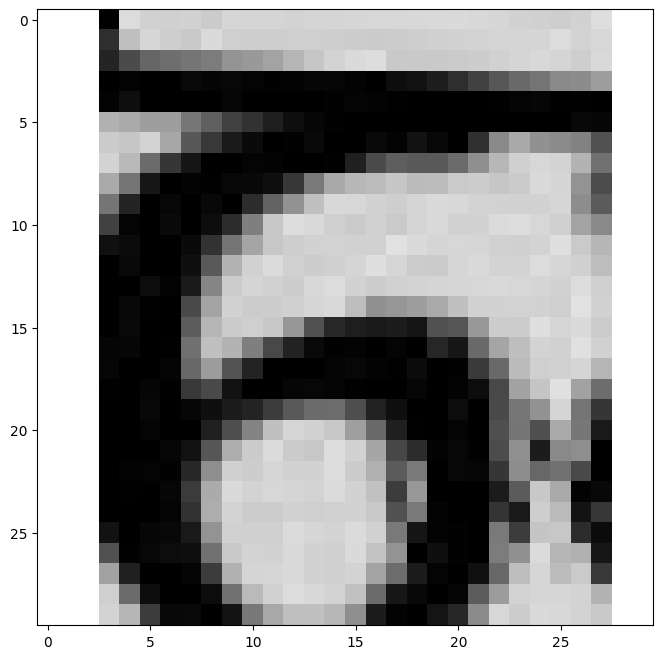

8260


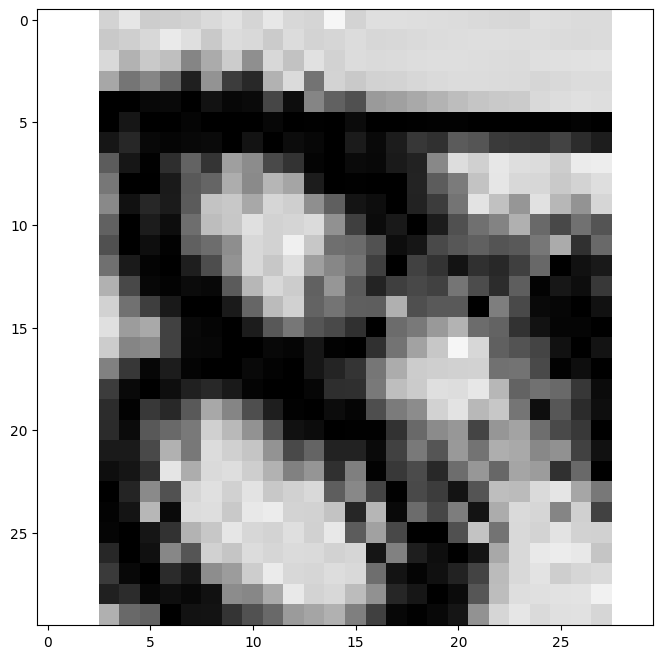

y360


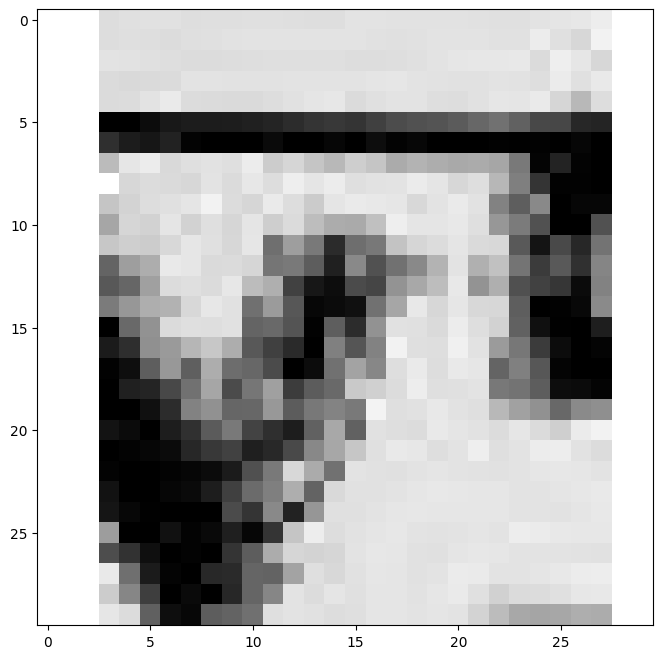

5460


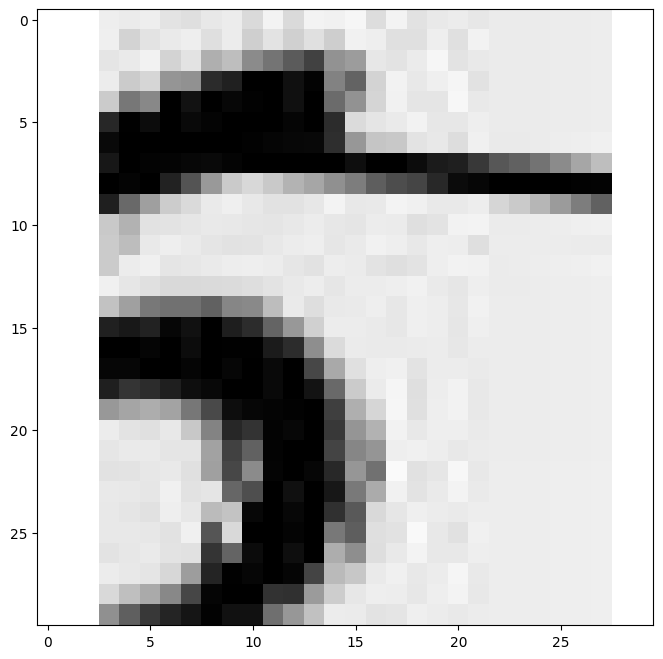

In [ ]:
for i in range(5):
  print(test_labels_seg_perform[choice*5 + i])
  plt.imshow(test_data_seg_perform[choice*5 + i], "gray")
  plt.show()

In [ ]:
character_counts = {0: 'b', 1: 'c', 2: 'd', 3: 'e', 4: 'f', 5: 'g', 6: 'm', 7: 'n', 8: 'p', 9: 'w', 10: 'x', 11: 'y', 12: '2', 13: '3', 14: '4', 15: '5', 16: '6', 17: '7', 18: '8'}

for i in range(5):
    prediction = predictions[choice * 5 + i]
    test_label = test_labels_indexed[choice * 5 + i]

    print("Prediction for symbol", i, ":", character_counts[prediction])
    print("Test_labels_indexed for symbol", i, ":", character_counts[test_label])
    print(" ")
    print("------------------------------------")


Prediction for symbol 0 : 3
Test_labels_indexed for symbol 0 : 3
 
------------------------------------
Prediction for symbol 1 : 6
Test_labels_indexed for symbol 1 : 6
 
------------------------------------
Prediction for symbol 2 : 8
Test_labels_indexed for symbol 2 : 8
 
------------------------------------
Prediction for symbol 3 : y
Test_labels_indexed for symbol 3 : y
 
------------------------------------
Prediction for symbol 4 : 5
Test_labels_indexed for symbol 4 : 5
 
------------------------------------


Demo end

In [ ]:
correct = 0

# Loop through the predictions and test labels in steps of 5
for i in range(0, len(predictions), 5):
    # Check if we have enough elements to form a group of 5
    if i + 5 <= len(predictions):
        group_correct = True  # Flag to check if all 5 are correct
        for j in range(5):
            if predictions[i + j] != test_labels_indexed[i + j]:
                group_correct = False
                break  # Skip the rest of the 5 and go to the next group
        if group_correct:
            correct += 1

print(f"Number of correct groups of 5: {correct}")

Number of correct groups of 5: 51


In [ ]:
print(classification_report(test_labels_indexed, predictions))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       1.00      0.92      0.96        12
           2       0.90      1.00      0.95         9
           3       1.00      0.90      0.95        10
           4       1.00      0.90      0.95        10
           5       1.00      0.85      0.92        20
           6       0.93      1.00      0.96        13
           7       0.93      0.96      0.95        28
           8       0.81      0.87      0.84        15
           9       1.00      1.00      1.00         9
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      0.91      0.95        65
          13       0.88      0.97      0.93        39
          14       0.96      1.00      0.98        23
          15       0.83      0.90      0.86        21
          16       0.90      0.82      0.86        11
          17       0.94    

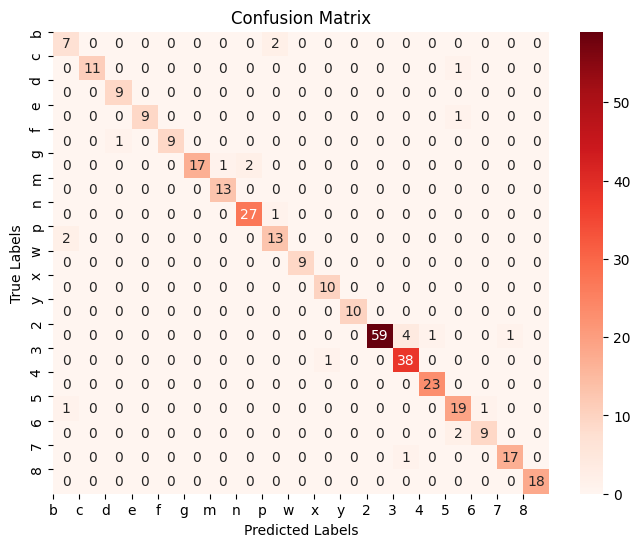

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
character_counts = {'b': 0, 'c': 1, 'd': 2, 'e': 3, 'f': 4, 'g': 5, 'm': 6, 'n': 7, 'p': 8, 'w': 9, 'x': 10, 'y': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18}

# Example predictions and actual labels (replace these with your own data)
predictions = predictions
actual_labels = test_labels_indexed

# Calculate confusion matrix
conf_matrix = confusion_matrix(actual_labels, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g')

# Customize x and y axis labels using character_counts dictionary keys
plt.xticks(ticks=range(len(character_counts)), labels=list(character_counts.keys()))
plt.yticks(ticks=range(len(character_counts)), labels=list(character_counts.keys()))

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [ ]:
import numpy as np
from scipy import stats

# Example usage with hypothetical means, standard deviations, and sample sizes
mean1_acc, std1_acc, n1_acc = 92.18, 0.63, 4
mean2_acc, std2_acc, n2_acc = 94.32, 0.48, 4

# Simulate data based on the summary statistics
np.random.seed(0)  # For reproducibility
simulated_acc1 = np.random.normal(loc=mean1_acc, scale=std1_acc, size=n1_acc)
simulated_acc2 = np.random.normal(loc=mean2_acc, scale=std2_acc, size=n2_acc)

# Perform the KS test to compare the two distributions
ks_stat, ks_p_value = stats.ks_2samp(simulated_acc1, simulated_acc2)

# Perform the t-test to compare the means
t_stat_acc, p_value_acc = stats.ttest_ind(simulated_acc1, simulated_acc2)

print("KS test:", ks_stat, ks_p_value)
print("Accuracy t-test:", t_stat_acc, p_value_acc)

# Repeat the process for F1 score and MCC
mean1_f1, std1_f1, n1_f1 = 92.99, 0.75, 4
mean2_f1, std2_f1, n2_f1 = 94.50, 0.40, 4

simulated_f1_1 = np.random.normal(loc=mean1_f1, scale=std1_f1, size=n1_f1)
simulated_f1_2 = np.random.normal(loc=mean2_f1, scale=std2_f1, size=n2_f1)

ks_stat_f1, ks_p_value_f1 = stats.ks_2samp(simulated_f1_1, simulated_f1_2)
t_stat_f1, p_value_f1 = stats.ttest_ind(simulated_f1_1, simulated_f1_2)

print("F1 Score KS test:", ks_stat_f1, ks_p_value_f1)
print("F1 Score t-test:", t_stat_f1, p_value_f1)

mean1_mcc, std1_mcc, n1_mcc = 92.18, 0.66, 4
mean2_mcc, std2_mcc, n2_mcc = 94.01, 0.51, 4

simulated_mcc1 = np.random.normal(loc=mean1_mcc, scale=std1_mcc, size=n1_mcc)
simulated_mcc2 = np.random.normal(loc=mean2_mcc, scale=std2_mcc, size=n2_mcc)

ks_stat_mcc, ks_p_value_mcc = stats.ks_2samp(simulated_mcc1, simulated_mcc2)
t_stat_mcc, p_value_mcc = stats.ttest_ind(simulated_mcc1, simulated_mcc2)

print("MCC KS test:", ks_stat_mcc, ks_p_value_mcc)
print("MCC t-test:", t_stat_mcc, p_value_mcc)



KS test: 1.0 0.028571428571428577
Accuracy t-test: -3.788074745164788 0.009093870985821846
F1 Score KS test: 1.0 0.028571428571428577
F1 Score t-test: -5.027688020666858 0.002385781021888454
MCC KS test: 0.75 0.22857142857142862
MCC t-test: -2.8531806659921823 0.02906019450862766


#New model - kind of bad now so ignor it

In [ ]:
import os

file_names = []
for filename in os.listdir(folder_path):
    file_names.append(filename)

def get_image_name(i):
    image_path = "/content/drive/MyDrive/Project/samples/" + file_names[i]
    return image_path

# Extract labels from filenames
image_labels = []
for filename in file_names:
    # Assuming filenames have the format "ABCDE_image.jpg", where "ABCDE" is the label
    label = filename.split('_')[0][:5]  # Extract the first five characters before the first underscore
    image_labels.append(label)

image_data = []
for filename in file_names:
    #getting the image data and storing it \
    image_data.append(process_image(cv2.imread(get_image_name(1), 0), i, 0))

3ym7f.png


UnboundLocalError: local variable 'final' referenced before assignment

1070
3ym7f
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


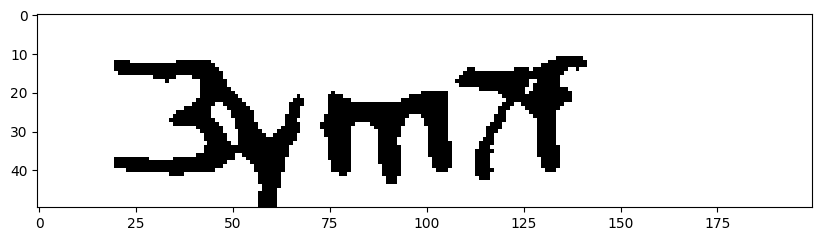

In [ ]:
print(len(file_names))
print(image_labels[1])
print(image_data[1])
plt.imshow(image_data[1],"gray")

In [ ]:
character_counts = {'b': 0, 'c': 1, 'd': 2, 'e': 3, 'f': 4, 'g': 5, 'm': 6, 'n': 7, 'p': 8, 'w': 9, 'x': 10, 'y': 11,'2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18}

import numpy as np
from keras.utils import to_categorical

# Example labels for two images
labels = image_labels

# Convert labels to one-hot encoded format
num_classes = len(character_counts)  # Assuming you have 19 classes
max_letters = 5  # Assuming each image contains 5 letters

def encode_label(label):
    # Convert each letter into its corresponding class index
    class_indices = [character_counts[char] for char in label]
    # Convert class indices into one-hot encoded format
    return to_categorical(class_indices, num_classes=num_classes)

# Prepare labels for all images
encoded_labels = [encode_label(label) for label in labels]

# Pad or truncate sequences to ensure they all have the same length (5)
for i in range(len(encoded_labels)):
    if len(encoded_labels[i]) < max_letters:
        # Pad with zeros
        padding = np.zeros((max_letters - len(encoded_labels[i]), num_classes))
        encoded_labels[i] = np.concatenate((encoded_labels[i], padding))
    elif len(encoded_labels[i]) > max_letters:
        # Truncate
        encoded_labels[i] = encoded_labels[i][:max_letters]

# Convert list of arrays to numpy array
encoded_labels = np.array(encoded_labels)

print("Encoded Labels Shape:", encoded_labels.shape)
print("Encoded Labels Shape:", encoded_labels[1])

Encoded Labels Shape: (1070, 5, 19)
Encoded Labels Shape: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get predictions from the model
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

Stuff below is mostly rubbish

In [ ]:
# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from keras.utils import to_categorical

# Define model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 200, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Total number of classes
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

image_data = np.array(image_data)
image_labels = np.array(image_labels)

# Normalize pixel values to range [0, 1]
image_data = image_data / 255.0
print(encoded_labels.shape)
train_data, test_data, train_labels, test_labels = train_test_split(image_data, encoded_labels, test_size=0.2, random_state=42)

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=1070)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

# Make predictions
predictions = model.predict(test_data)

(1070, 5, 19)
Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5, 19) and (None, 19) are incompatible


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedKFold
# Calculate the labels based on one-hot encoded labels
labels = np.argmax(one_hot_encoded_labels, axis=1)

# Split the data into training, validation, and test sets with stratified sampling
# First split into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(image_data_seg, one_hot_encoded_labels, test_size=0.2, stratify=labels, random_state=42)


data = np.array(train_data)
labels = np.array(train_labels)


# Define the number of folds
k = 5

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store scores
all_train_scores = []
all_val_scores = []

# Loop over the folds
for train_index, test_index in skf.split(data, np.argmax(labels, axis=1)):
    # Split data into training, validation, and test sets
    train_data, val_data = data[train_index], data[test_index]
    train_labels, val_labels = labels[train_index], labels[test_index]

    # Normalize the data
    train_data = train_data / 255.0
    val_data = val_data / 255.0

    # Add color channel
    train_data = train_data.reshape(train_data.shape[0], 30, 30, 1)
    val_data = val_data.reshape(val_data.shape[0], 30, 30, 1)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Calculate the labels based on one-hot encoded labels
labels = np.argmax(one_hot_encoded_labels, axis=1)

# Split the data into training, validation, and test sets with stratified sampling
# First split into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(image_data_seg, one_hot_encoded_labels, test_size=0.2, stratify=labels, random_state=42)

# # Then split the training set into training and validation sets
# train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, stratify=train_labels, random_state=42)

# # Convert lists to numpy arrays
# train_data = np.array(train_data)
# val_data = np.array(val_data)
# test_data = np.array(test_data)
# train_labels = np.array(train_labels)
# val_labels = np.array(val_labels)
# test_labels = np.array(test_labels)

# # Normalize the data
# train_data = train_data / 255.0
# val_data = val_data / 255.0
# test_data = test_data / 255.0

# # Add color channel
# train_data = train_data.reshape(train_data.shape[0], 30, 30, 1)
# val_data = val_data.reshape(val_data.shape[0], 30, 30, 1)
# test_data = test_data.reshape(test_data.shape[0], 30, 30, 1)

In [ ]:
# Convert lists to numpy arrays
train_data = np.array(train_data)
val_data = np.array(val_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

# Normalize the data
test_data = test_data / 255.0

# Add color channel
test_data = test_data.reshape(test_data.shape[0], 30, 30, 1)